# Affordable Housing in Nashville/Davidson County

### Part 1: Data Wrangling Basics with Pandas

The pandas library will be our Swiss Army knife for data analysis. We will be using pandas DataFrames, which are useful for manipulating tabular, nonhomogenous data.

First, import the pandas library with the alias pd:

In [1]:
import pandas as pd

To create our first DataFrame, we need to point pandas to the csv file we want to import and use the `read_csv` method:

In [2]:
houses_2009 = pd.read_csv('data/2009SINGLEFAMILYSF.txt')

We can now view the first few rows using the `.head()` method. We can also inspect the last few rows using `.tail()`.

In [3]:
houses_2009.head(n=10)

,APN,DistrictCode,Council District,AddressFullAddress,AddressCity,AddressPostalCode,2009 LAND,2009 IMPR,2009 TOTAL APPR,2009 TOTAL ASSD,FinishedArea
0,00200000300,RT,10,1012 OLD BUCK HILL RD,GOODLETTSVILLE,37072,49800.0,65700.0,115500.0,28875.0,1920.0
1,00200000700,RT,10,1109 HIGHLAND AVE,GOODLETTSVILLE,37072,44100.0,88700.0,132800.0,33200.0,1464.0
2,00200001001002,GSD,10,0 SPRINGFIELD HWY,GOODLETTSVILLE,37072,15000.0,137900.0,152900.0,38225.0,3539.0
3,00200001400001,RT,10,133 B EAST END RD,GOODLETTSVILLE,37072,41100.0,27000.0,68100.0,17025.0,736.0
4,00200001600001,RT,10,141 B EAST END RD,GOODLETTSVILLE,37072,25100.0,60900.0,86000.0,21500.0,1301.0
5,00200002400,GSD,10,226 EAST END RD,GOODLETTSVILLE,37072,41800.0,129800.0,171600.0,42900.0,1998.0
6,00200002401,GSD,10,231 EAST END RD,GOODLETTSVILLE,37072,28000.0,87800.0,115800.0,28950.0,2028.0
7,00200002700,RT,10,112 EAST END RD,GOODLETTSVILLE,37072,21000.0,119300.0,140300.0,35075.0,2627.0
8,00200003000001,RT,10,156 B EAST END RD,GOODLETTSVILLE,37072,37300.0,122600.0,159900.0,39975.0,1830.0
9,00200003100,RT,10,148 EAST END RD,GOODLETTSVILLE,37072,21000.0,14300.0,35300.0,8825.0,693.0


In [4]:
houses_2009.tail()

,APN,DistrictCode,Council District,AddressFullAddress,AddressCity,AddressPostalCode,2009 LAND,2009 IMPR,2009 TOTAL APPR,2009 TOTAL ASSD,FinishedArea
183401,188100A10000CO,GSD,33,1437 WINDING CREEK DR,NOLENSVILLE,37135,40000.0,39400.0,79400.0,19850.0,1652.0
183402,188100A10100CO,GSD,33,1435 WINDING CREEK DR,NOLENSVILLE,37135,40000.0,36700.0,76700.0,19175.0,1512.0
183403,188100A10200CO,GSD,33,1433 WINDING CREEK DR,NOLENSVILLE,37135,40000.0,39400.0,79400.0,19850.0,1652.0
183404,188100A12300CO,GSD,33,1717 PARK TERRACE LN,NOLENSVILLE,37135,50000.0,339400.0,389400.0,97350.0,3222.0
183405,188100A12400CO,GSD,33,2104 GLEN HAVEN DR,NOLENSVILLE,37135,40000.0,188500.0,228500.0,57125.0,1952.0


We can check the dimensions of our DataFrame using `.shape`. This returns a tuple (number of rows, number of columns).

In [5]:
houses_2009.shape

(183406, 11)

In [6]:
houses_2009.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183406 entries, 0 to 183405
Data columns (total 11 columns):
APN                   183406 non-null object
DistrictCode          183406 non-null object
Council District      183406 non-null int64
AddressFullAddress    183406 non-null object
AddressCity           183406 non-null object
AddressPostalCode     183406 non-null int64
2009 LAND             183406 non-null float64
2009 IMPR             183406 non-null float64
2009 TOTAL APPR       183406 non-null float64
2009 TOTAL ASSD       183406 non-null float64
FinishedArea          183406 non-null float64
dtypes: float64(5), int64(2), object(4)
memory usage: 15.4+ MB


Now, let's look a the column names:

In [7]:
houses_2009.columns

Index(['APN', 'DistrictCode', 'Council District', 'AddressFullAddress',
       'AddressCity', 'AddressPostalCode', '2009 LAND', '2009 IMPR',
       '2009 TOTAL APPR', '2009 TOTAL ASSD', 'FinishedArea'],
      dtype='object')

We can access a column by using `houses_2009["<column name>"]`.

In [8]:
houses_2009["FinishedArea"].head()

0    1920.0
1    1464.0
2    3539.0
3     736.0
4    1301.0
Name: FinishedArea, dtype: float64

Let's adjust the column names. It is a lot easier to work with columns that do not have spaces or start with a number. This will make using tab-completion easier, and will allow us to access a particular column using `houses_2009.<column_name>`.

The `map` method allows us to apply a function to all elements of a pandas Series or Index.

In [9]:
def square(x):
    return x**2

example_series = pd.Series([1,2,3,4,5])

example_series.map(square)

0     1
1     4
2     9
3    16
4    25
dtype: int64

To accomplish renaming the columns, we can use a **lambda function**. A lambda function is an anonymous function which does not need to be declared ahead of its use.

Lambda functions come in handy when you need a function that you are using for one task.

In [10]:
example_series.map(lambda x: x**2)

0     1
1     4
2     9
3    16
4    25
dtype: int64

To replace a portion of a string, we can use the `replace` string method:

In [11]:
'example string'.replace('ex', 's')

'sample string'

**Exercise:** Use `.map` with a lambda function to remove the spaces and "2009"s from our DataFrame's column names.

In [12]:
houses_2009.columns = houses_2009.columns.map(lambda x: x.replace(' ', '').replace('2009', ''))
houses_2009.columns

Index(['APN', 'DistrictCode', 'CouncilDistrict', 'AddressFullAddress',
       'AddressCity', 'AddressPostalCode', 'LAND', 'IMPR', 'TOTALAPPR',
       'TOTALASSD', 'FinishedArea'],
      dtype='object')

In [13]:
houses_2009.TOTALAPPR.head()

0    115500.0
1    132800.0
2    152900.0
3     68100.0
4     86000.0
Name: TOTALAPPR, dtype: float64

**Exercise:** Read in the 2013 and 2017 files and change the column names in the same way as for the 2009 file.

In [14]:
houses_2013 = pd.read_csv('data/2013SINGLEFAMILYSF.txt')
houses_2017 = pd.read_csv('data/2017SINGLEFAMILYSF.txt')

In [15]:
houses_2013.columns = houses_2013.columns.map(lambda x: x.replace(' ', '').replace('2013', ''))
houses_2017.columns = houses_2017.columns.map(lambda x: x.replace(' ', '').replace('2017', ''))

### Part 2: Slicing, Counting, and Basic Plots

If we want to see the different entries for a column, we can use the `.unique()` method:

In [16]:
houses_2009.AddressCity.unique()

array(['GOODLETTSVILLE', 'JOELTON', 'WHITES CREEK', 'MADISON',
       'NASHVILLE', 'OLD HICKORY', 'ASHLAND CITY', 'HERMITAGE', 'PEGRAM',
       'MOUNT JULIET', 'ANTIOCH', 'BELLEVUE', 'BRENTWOOD', 'LAVERGNE',
       'FRANKLIN', 'NOLENSVILLE'], dtype=object)

The `.value_counts()` method will give a tally of the entries in a particular column, sorted in descending order by default. For example, let's say we want to get a tally of homes by city.

In [17]:
houses_2009.AddressCity.value_counts()

NASHVILLE         126590
ANTIOCH            20028
MADISON             9675
HERMITAGE           9615
OLD HICKORY         5267
BRENTWOOD           4534
GOODLETTSVILLE      4275
JOELTON             1479
WHITES CREEK        1173
NOLENSVILLE          278
PEGRAM               174
ASHLAND CITY         160
MOUNT JULIET         128
FRANKLIN              24
LAVERGNE               3
BELLEVUE               3
Name: AddressCity, dtype: int64

**Exercise:** Use `value_counts()` to get a tally of homes by their full address.

In [18]:
houses_2009.AddressFullAddress.value_counts()

0 EDMONDSON PIKE           21
0 WOODMONT BLVD            18
0 HILLSBORO PIKE           14
1110 W TRINITY LN           3
0 HITT LN                   3
105 SHEPHERD HILLS DR       3
0 PENNINGTON BEND RD        3
807 18TH AVE S              3
2401 LAKESHORE DR           2
1281 OLD HICKORY BLVD       2
0 LEBANON PIKE              2
107 MCARTHUR DR             2
1201 GRAYBAR LN             2
4844 SHASTA DR              2
2732 B TUCKER RD            2
7872 CHARLOTTE PIKE         2
110 WESTHAMPTON PL          2
115 CREIGHTON AVE           2
0 BRICK CHURCH LN           2
1608 CHICKERING RD          2
4153 DODSON CHAPEL RD       2
6666 BROOKMONT TER 210      2
1300 OLD HICKORY BLVD       2
113 SANITARIUM RD           2
828 NEELYS BEND RD          2
0 RAY AVE                   2
2073 NASHBORO BLVD          2
501 WILSON BLVD             2
1001 RACHELS SQUARE DR      2
4848 SHASTA DR              2
                           ..
2707 GREYSTONE RD           1
8220 GREENVALE CT           1
427 TONEY 

How many addresses are duplicated? To answer this, we can use an inequality to return a Boolean series:

In [19]:
houses_2009.AddressFullAddress.value_counts() > 1

0 EDMONDSON PIKE            True
0 WOODMONT BLVD             True
0 HILLSBORO PIKE            True
1110 W TRINITY LN           True
0 HITT LN                   True
105 SHEPHERD HILLS DR       True
0 PENNINGTON BEND RD        True
807 18TH AVE S              True
2401 LAKESHORE DR           True
1281 OLD HICKORY BLVD       True
0 LEBANON PIKE              True
107 MCARTHUR DR             True
1201 GRAYBAR LN             True
4844 SHASTA DR              True
2732 B TUCKER RD            True
7872 CHARLOTTE PIKE         True
110 WESTHAMPTON PL          True
115 CREIGHTON AVE           True
0 BRICK CHURCH LN           True
1608 CHICKERING RD          True
4153 DODSON CHAPEL RD       True
6666 BROOKMONT TER 210      True
1300 OLD HICKORY BLVD       True
113 SANITARIUM RD           True
828 NEELYS BEND RD          True
0 RAY AVE                   True
2073 NASHBORO BLVD          True
501 WILSON BLVD             True
1001 RACHELS SQUARE DR      True
4848 SHASTA DR              True
          

Python lets us do arithmetic with Booleans. True = 1 and False = 0:

In [20]:
(houses_2009.AddressFullAddress.value_counts() > 1).sum()

88

Let's investigate the most common address, 0 Edmondson Pike. 

One way to filter a pandas DataFrame is to slice it using `.loc`. The syntax will look like `houses_2009.loc[<boolean array>]`.

**Exercise:** Create a boolean array that indicates whether the address in a particular row is equal to 0 Edmondson Pike.

In [21]:
houses_2009.AddressFullAddress == "0 EDMONDSON PIKE"

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
183376    False
183377    False
183378    False
183379    False
183380    False
183381    False
183382    False
183383    False
183384    False
183385    False
183386    False
183387    False
183388    False
183389    False
183390    False
183391    False
183392    False
183393    False
183394    False
183395    False
183396    False
183397    False
183398    False
183399    False
183400    False
183401    False
183402    False
183403    False
183404    False
183405    False
Name: AddressFullAddress

In [22]:
houses_2009.loc[houses_2009.AddressFullAddress == "0 EDMONDSON PIKE"]

,APN,DistrictCode,CouncilDistrict,AddressFullAddress,AddressCity,AddressPostalCode,LAND,IMPR,TOTALAPPR,TOTALASSD,FinishedArea
160845,161010A00100CO,USD,27,0 EDMONDSON PIKE,NASHVILLE,37211,2000.0,5400.0,7400.0,1850.0,0.0
160846,161010A00200CO,USD,27,0 EDMONDSON PIKE,NASHVILLE,37211,2000.0,5400.0,7400.0,1850.0,0.0
160847,161010A00300CO,USD,27,0 EDMONDSON PIKE,NASHVILLE,37211,2000.0,5400.0,7400.0,1850.0,0.0
160848,161010A00400CO,USD,27,0 EDMONDSON PIKE,NASHVILLE,37211,2000.0,5400.0,7400.0,1850.0,0.0
160849,161010A00500CO,USD,27,0 EDMONDSON PIKE,NASHVILLE,37211,2000.0,5400.0,7400.0,1850.0,0.0
160850,161010A00600CO,USD,27,0 EDMONDSON PIKE,NASHVILLE,37211,2000.0,5400.0,7400.0,1850.0,0.0
160851,161010A00700CO,USD,27,0 EDMONDSON PIKE,NASHVILLE,37211,2000.0,5400.0,7400.0,1850.0,0.0
160852,161010A00800CO,USD,27,0 EDMONDSON PIKE,NASHVILLE,37211,2000.0,5400.0,7400.0,1850.0,0.0
160853,161010A00900CO,USD,27,0 EDMONDSON PIKE,NASHVILLE,37211,2000.0,5400.0,7400.0,1850.0,0.0
160854,161010A01000CO,USD,27,0 EDMONDSON PIKE,NASHVILLE,37211,2000.0,5400.0,7400.0,1850.0,0.0


**Exercise:** Use `.loc` to determine how many times O EDMONDSON PIKE appears in the 2013 and 2017 datasets.

In [23]:
houses_2013.loc[houses_2013.AddressFullAddress == "0 EDMONDSON PIKE"].shape

(21, 11)

In [24]:
houses_2017.loc[houses_2017.AddressFullAddress == "0 EDMONDSON PIKE"].shape

(21, 11)

**Harder Exercise:** How many homes in our 2009 dataset have house number 0?  
Hint: To use string methods on columns of DataFrames which are strings, access that column and then use .str. For example, try `houses_2009.str.lower()`

In [25]:
houses_2009.loc[houses_2009.AddressFullAddress.str[:2] == '0 '].AddressFullAddress.nunique()

56

In [26]:
houses_2009.loc[houses_2009.AddressFullAddress.str[:2] == '0 '].AddressFullAddress.value_counts()

0 EDMONDSON PIKE        21
0 WOODMONT BLVD         18
0 HILLSBORO PIKE        14
0 PENNINGTON BEND RD     3
0 HITT LN                3
0 PENNSYLVANIA AVE       2
0 RAY AVE                2
0 BURKITT RD             2
0 BRICK CHURCH LN        2
0 VILLA GREEN DR         2
0 BILTMORE DR            2
0 LEBANON PIKE           2
0 MARLBOROUGH AVE        2
0 OLD HICKORY BLVD       2
0 RIDGEWOOD RD           2
0 MORGAN RD              1
0 GLOUCESTER LN          1
0 27TH AVE S             1
0 PRESTON RD             1
0 ROSEHILL DR            1
0 TRANHAM RD             1
0 JOHN HAGAR RD          1
0 RIVER ROAD PIKE        1
0 BLUE BERRY HILL RD     1
0 NEELYS BEND RD         1
0 FREEMAN HOLLOW RD      1
0 HERMITAGE RDG          1
0 POPLAR CREEK RD        1
0 HARBORWOOD DR          1
0 CHICKERING RD          1
0 HIGHWAY 70 S           1
0 BURCH ST               1
0 BRICK CHURCH PIKE      1
0 RAWLINGS RD            1
0 DRAKE ST               1
0 HOOTEN HOWS RD         1
0 MT VIEW RD             1
0

It is not clear what is going on with this particular address, but we need to decide what to do with our duplicate addresses. One option is to drop all duplicates, which can be accomplished using the `.drop_dupliates()` method and specifying that we want to drop based on the `AddressFullAddress` column. Don't forget that we need to save the modified DataFrame back to itself.

In [27]:
houses_2009 = houses_2009.drop_duplicates('AddressFullAddress')
houses_2013 = houses_2013.drop_duplicates('AddressFullAddress')
houses_2017 = houses_2017.drop_duplicates('AddressFullAddress')

Time for some plots! Let's look at the number of single family homes assessed in each district. 

In order to get our plots to display, we can use the ipython magic command `%matplotlib inline`.

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

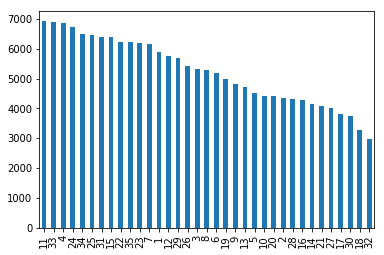

In [29]:
houses_2009.CouncilDistrict.value_counts().plot.bar()

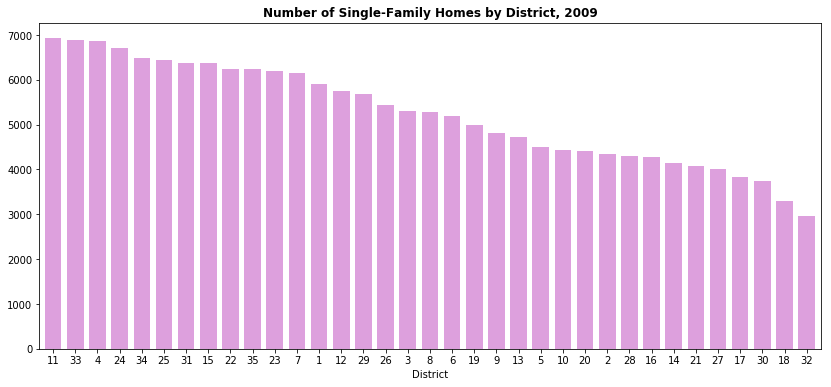

In [30]:
fig = houses_2009.CouncilDistrict.value_counts().plot.bar(figsize = (14,6), width = 0.75,
                                                         rot = 0, color = 'plum')
fig.set_xlabel('District')
fig.set_title('Number of Single-Family Homes by District, 2009', fontweight = 'bold');

**Exercise:** Create a bar chart showing the number of single-family homes by zip code for 2009.

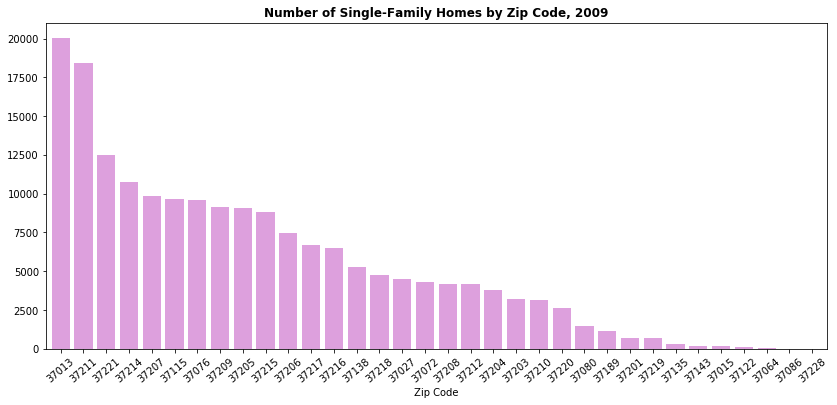

In [31]:
fig = houses_2009.AddressPostalCode.value_counts().plot.bar(figsize = (14,6),
                                                         rot = 40, color = 'plum', width = 0.8)
fig.set_xlabel('Zip Code')
fig.set_title('Number of Single-Family Homes by Zip Code, 2009', fontweight = 'bold');

If we want to display data for one variable, we can use a histogram. For example, let's say we want to look at the distribution of square footages.

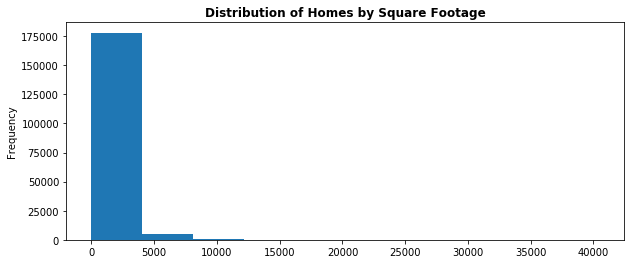

In [32]:
fig = houses_2009.FinishedArea.plot.hist(figsize = (10,4))
fig.set_title('Distribution of Homes by Square Footage', fontweight = 'bold');

We get some extreme square footages - let's investigate.

**Exercise:** Slice our houses_2009 DataFrame to find all homes that have finished area of at least 20,000 sqft.

In [33]:
houses_2009.loc[houses_2009.FinishedArea >= 20000]

,APN,DistrictCode,CouncilDistrict,AddressFullAddress,AddressCity,AddressPostalCode,LAND,IMPR,TOTALAPPR,TOTALASSD,FinishedArea
5386,03300000900,GSD,3,1250 GENELLE DR,GOODLETTSVILLE,37072,144000.0,1226800.0,1370800.0,342700.0,36676.46094
14741,04900014000,GSD,3,4225 WHITES CREEK PIKE,WHITES CREEK,37189,557600.0,1698900.0,2256500.0,564125.0,20068.75000
45793,07500004200,GSD,11,4336 ANDREW JACKSON PKWY,HERMITAGE,37076,917300.0,3100800.0,4018100.0,1607240.0,40418.00000
46307,07506015100,GSD,11,15 ASBURY LN,HERMITAGE,37076,493900.0,1444000.0,1937900.0,775160.0,21586.00000
72781,09306208300,CBID,19,114 2ND AVE N,NASHVILLE,37201,443000.0,711800.0,1154800.0,288700.0,21242.00000
102085,11615000100,BM,23,416 JACKSON BLVD,NASHVILLE,37205,1541800.0,4055600.0,5597400.0,1399350.0,20808.98047
102090,11615000700,BM,23,530 JACKSON BLVD,NASHVILLE,37205,1464900.0,5847900.0,7312800.0,1828200.0,21014.50000
138211,14400001200,FH,34,6123 HILLSBORO PIKE,NASHVILLE,37215,708400.0,4241000.0,4949400.0,1237350.0,20537.56055
138298,14401001000,FH,34,1358 PAGE RD,NASHVILLE,37205,1050000.0,8508500.0,9558500.0,2389625.0,20868.00000
138424,14407000500,FH,34,1152 CRATER HILL DR,NASHVILLE,37215,3120000.0,7257000.0,10377000.0,2594250.0,20394.00000


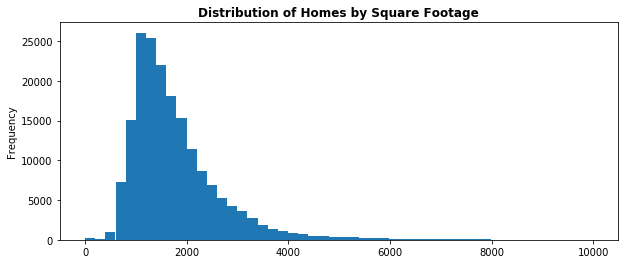

In [34]:
fig = houses_2009.loc[houses_2009.FinishedArea < 10000].FinishedArea.plot.hist(figsize = (10,4), bins = 50)
fig.set_title('Distribution of Homes by Square Footage', fontweight = 'bold');

**Exercise:** Create a histograms showing distributions of appraisal values for homes in Madison and for homes in Brentwood. Plot both on the same figure.

**Harder Exercise:** Show only homes which appraisal values less than $1,000,000.
Hint: To slice a DataFrame with `.loc` using multiple boolean series, separate the series with & for AND or | for OR. For example, to find all homes in Antioch that are at least 4,000 square feet, you can use `houses_2009.loc[(houses_2009.AddressCity == "ANTIOCH") & (houses_2009.FinishedArea >= 4000)]`

In [35]:
houses_2009.loc[(houses_2009.AddressCity == "ANTIOCH") & (houses_2009.FinishedArea >= 4000)]

,APN,DistrictCode,CouncilDistrict,AddressFullAddress,AddressCity,AddressPostalCode,LAND,IMPR,TOTALAPPR,TOTALASSD,FinishedArea
145759,14812010200,USD,28,4720 MCBRIDE RD,ANTIOCH,37013,25000.0,172200.0,197200.0,49300.0,4645.00000
146839,14900035100,USD,28,4226 MOSS RD,ANTIOCH,37013,92400.0,524300.0,616700.0,154175.0,4469.00000
147345,149020B13700CO,USD,28,2224 COTTAGE HILL DR,ANTIOCH,37013,53300.0,435100.0,488400.0,122100.0,7666.81250
148437,149070A00900CO,USD,28,713 DOVER GLEN DR,ANTIOCH,37013,31000.0,171200.0,202200.0,50550.0,4074.00000
149732,14916001500,USD,32,608 BELL RIDGE TRCE,ANTIOCH,37013,58500.0,409400.0,467900.0,116975.0,4752.00000
153833,150120B02600CO,USD,33,3805 PARK ROYAL LN,ANTIOCH,37013,43000.0,213400.0,256400.0,64100.0,4567.50000
153888,15013000300,USD,33,3553 ROUNDWOOD FOREST DR,ANTIOCH,37013,22100.0,227500.0,249600.0,62400.0,4418.00000
154700,151090A16700CO,USD,33,4320 CAMBRIDGE DR,ANTIOCH,37013,32000.0,231000.0,263000.0,65750.0,4159.50000
167695,163020B03600CO,USD,28,504 PIPPIN DR,ANTIOCH,37013,43000.0,341600.0,384600.0,96150.0,4658.00000
168758,16400000100,USD,32,3021 MURFREESBORO PIKE,ANTIOCH,37013,797500.0,892900.0,1690400.0,422600.0,9922.00000


In [36]:
houses_2009.AddressCity.unique()

array(['GOODLETTSVILLE', 'JOELTON', 'WHITES CREEK', 'MADISON',
       'NASHVILLE', 'OLD HICKORY', 'ASHLAND CITY', 'HERMITAGE', 'PEGRAM',
       'MOUNT JULIET', 'ANTIOCH', 'BELLEVUE', 'BRENTWOOD', 'LAVERGNE',
       'FRANKLIN', 'NOLENSVILLE'], dtype=object)

In [37]:
print(houses_2009.loc[houses_2009.AddressCity == 'MADISON'].TOTALAPPR.max())
print(houses_2009.loc[houses_2009.AddressCity == 'BRENTWOOD'].TOTALAPPR.max())

911400.0
3181000.0


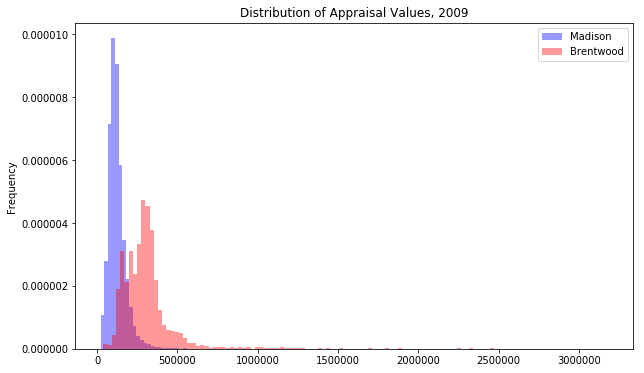

In [38]:
houses_2009.loc[houses_2009.AddressCity == 'MADISON'].TOTALAPPR.plot.hist(bins = 40, figsize = (10,6), alpha = 0.4, density = True, color='blue', label = 'Madison', 
                                                                          legend = True, title = 'Distribution of Appraisal Values, 2009')
houses_2009.loc[houses_2009.AddressCity == 'BRENTWOOD'].TOTALAPPR.plot.hist(bins = 120, figsize = (10,6), alpha = 0.4, density = True, color='red', label = 'Brentwood', legend = True);

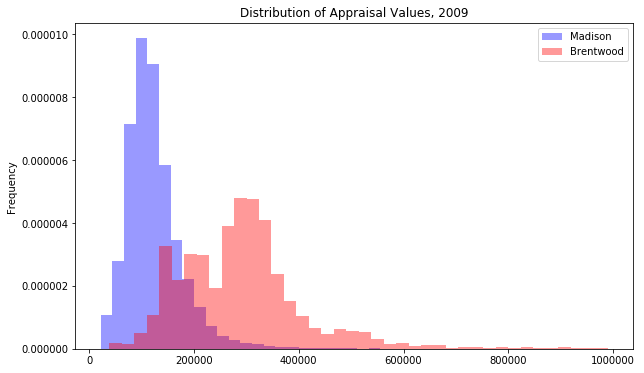

In [39]:
houses_2009.loc[(houses_2009.AddressCity == 'MADISON') & (houses_2009.TOTALAPPR < 1000000)].TOTALAPPR.plot.hist(bins = 40, figsize = (10,6), alpha = 0.4, density = True, color='blue', label = 'Madison', legend = True, title = 'Distribution of Appraisal Values, 2009')
houses_2009.loc[(houses_2009.AddressCity == 'BRENTWOOD') & (houses_2009.TOTALAPPR < 1000000)].TOTALAPPR.plot.hist(bins = 40, figsize = (10,6), alpha = 0.4, density = True, color='red', label = 'Brentwood', legend = True);

### Part 3: Introduction to GeoPandas

Let's create a map of these districts so we can get a better idea of where the supply of single-family homes is located.  

We will be using the geopandas library, which provides tools for working with geospatial data.

In [40]:
import geopandas as gpd

We need to load in a shape file that includes the boundaries for the council districts. We will be using a geojson file obtained from https://data.nashville.gov/General-Government/Council-District-Outlines-GIS-/m4q4-q7tc

In [41]:
council_districts = gpd.read_file('data/Council_District_Outlines.geojson')

In [42]:
council_districts.head()

,first_name,email,res_phone,bus_phone,last_name,position,district,geometry
0,Nick,nick.leonardo@nashville.gov,615-509-6334,615-862-6780,Leonardo,Council Member,1,(POLYGON ((-86.90738248774342 36.3905151283193...
1,DeCosta,decosta.hastings@nashville.gov,615-779-1565,615-862-6780,Hastings,Council Member,2,(POLYGON ((-86.75902399986667 36.2309080000732...
2,Nancy,nancy.vanreece@nashville.gov,615-576-0488,615-862-6780,VanReece,Council Member,8,(POLYGON ((-86.72850199989709 36.2832840002146...
3,Bill,bill.pridemore@nashville.gov,615-915-1419,615-862-6780,Pridemore,Council Member,9,(POLYGON ((-86.68680500011935 36.2867050001350...
4,Robert,robert.swope@nashville.gov,615-308-0577,615-862-6780,Swope,Council Member,4,(POLYGON ((-86.74488864807594 36.0531632050230...


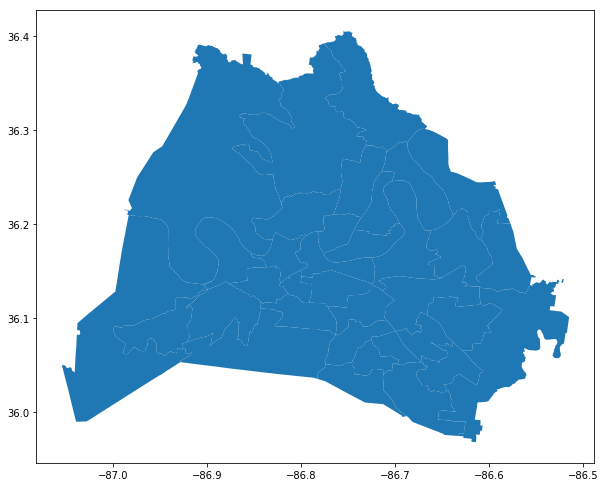

In [43]:
fig, ax = plt.subplots(figsize = (10,10))
council_districts.plot(ax = ax);

What if we want to label these districts? To do this, we'll need coordinates for the center of each district. The shapely library provides a `representative_point()` method which will, given a (multi)polygon, return a point within that polygon.

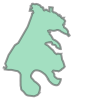

In [44]:
council_districts.loc[0, 'geometry']

In [45]:
print(council_districts.loc[0, 'geometry'])

MULTIPOLYGON (((-86.90738248774342 36.39051512831935, -86.90724599759132 36.39047599606477, -86.90712077830902 36.39045935427111, -86.90709288961021 36.39045681635266, -86.90709126795991 36.3904566888702, -86.9070228375947 36.39045129807834, -86.90678530821764 36.39035858378855, -86.90655049716736 36.3902658486752, -86.90653868788077 36.39026021552042, -86.90633732812566 36.39016416092636, -86.90608870289667 36.39005175055227, -86.90589755382997 36.38997407006486, -86.9057340354625 36.38993573813266, -86.90560599899838 36.38991032572338, -86.90551813423789 36.38988861286117, -86.90550242243239 36.38988473020141, -86.9054967158436 36.38988081389702, -86.90540106082253 36.38981516734991, -86.90531603104738 36.38974767979737, -86.90528769876397 36.38972706835073, -86.90521736238895 36.38967589911621, -86.9051107417481 36.38962175808646, -86.90491989623911 36.38957044419437, -86.90484888140313 36.38955083674644, -86.90477266052589 36.38952979170337, -86.90458961699872 36.38944765350064, -8

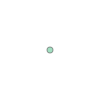

In [46]:
council_districts.loc[0, 'geometry'].representative_point()

In [47]:
type(council_districts.loc[0, 'geometry'].representative_point())

shapely.geometry.point.Point

In [48]:
list(council_districts.loc[0, 'geometry'].representative_point().coords)

[(-86.90970241884453, 36.26327799986527)]

**Exercise:** Use map and a lambda function to extract the representative point for each district. Save this as a new column called "coords".

In [49]:
council_districts['coords'] = council_districts.geometry.map(lambda x: x.representative_point().coords[:][0])

In [50]:
council_districts.head()

,first_name,email,res_phone,bus_phone,last_name,position,district,geometry,coords
0,Nick,nick.leonardo@nashville.gov,615-509-6334,615-862-6780,Leonardo,Council Member,1,(POLYGON ((-86.90738248774342 36.3905151283193...,"(-86.90970241884453, 36.26327799986527)"
1,DeCosta,decosta.hastings@nashville.gov,615-779-1565,615-862-6780,Hastings,Council Member,2,(POLYGON ((-86.75902399986667 36.2309080000732...,"(-86.79713738920347, 36.209998499786956)"
2,Nancy,nancy.vanreece@nashville.gov,615-576-0488,615-862-6780,VanReece,Council Member,8,(POLYGON ((-86.72850199989709 36.2832840002146...,"(-86.73924255649486, 36.24531199982642)"
3,Bill,bill.pridemore@nashville.gov,615-915-1419,615-862-6780,Pridemore,Council Member,9,(POLYGON ((-86.68680500011935 36.2867050001350...,"(-86.66879039599107, 36.24062099983553)"
4,Robert,robert.swope@nashville.gov,615-308-0577,615-862-6780,Swope,Council Member,4,(POLYGON ((-86.74488864807594 36.0531632050230...,"(-86.73590653419714, 36.02409350009242)"


Now, we need to add a label onto our map for each row in the dataset.

One way to access the rows in a dataframe one at a time is by using the `.iterrows()`, method, which produces a generator object. This is an object that we can iterate through.

In [51]:
rows = council_districts.iterrows()

In [52]:
next(rows)

(0, first_name                                                 Nick
 email                               nick.leonardo@nashville.gov
 res_phone                                          615-509-6334
 bus_phone                                          615-862-6780
 last_name                                              Leonardo
 position                                         Council Member
 district                                                      1
 geometry      (POLYGON ((-86.90738248774342 36.3905151283193...
 coords                  (-86.90970241884453, 36.26327799986527)
 Name: 0, dtype: object)

When we call `next`, we get a tuple which gives the index of the row and its values. We can unpack this tuple to extract what we want:

In [53]:
idx, row = next(rows)

In [54]:
row['district']

'2'

We can iterate through all of the rows using a `for` loop:

In [55]:
for idx, row in rows:
    print(row['district'])

8
9
4
13
14
15
16
24
25
26
5
6
7
3
10
17
18
19
27
28
29
20
21
12
11
30
31
32
22
23
33
34
35


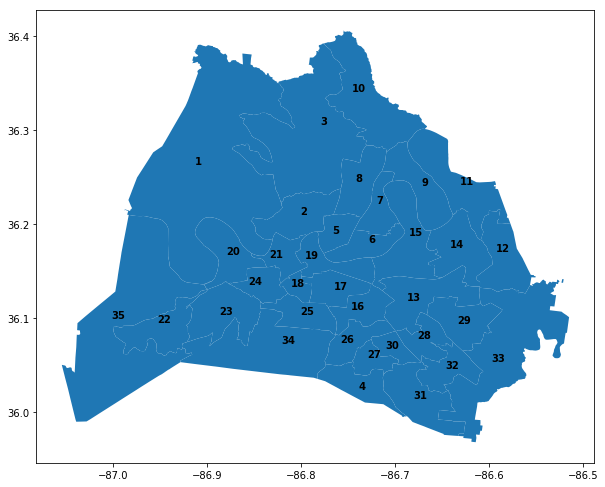

In [56]:
fig, ax = plt.subplots(figsize = (10,10))
council_districts.plot(ax = ax)
for idx, row in council_districts.iterrows():
    plt.annotate(s=row['district'], xy=row['coords'],
                 horizontalalignment='center', fontweight = 'bold')

Link to more detailed map: http://maps.nashville.gov/webimages/MapGallery/PDFMaps/2018%20Council%20Members.pdf

Some of these labels are in a less than ideal location. Look at, for example, District 11 on the northeast part of town.  
To correct these, we can write a helper function to nudge those points into a slightly better location.

In [57]:
def shift_coord(district, amount, direction):
    old_coord = council_districts.loc[council_districts.district == district, 'coords'].values[0]
    if direction == 'up':
        new_coord = (old_coord[0], old_coord[1] + amount)
    if direction == 'down':
        new_coord = (old_coord[0], old_coord[1] - amount)
    if direction == 'left':
        new_coord = (old_coord[0] - amount, old_coord[1])
    if direction == 'right':
        new_coord = (old_coord[0] + amount, old_coord[1])
    council_districts.loc[council_districts.district == district, 'lng'] = new_coord[0]
    council_districts.loc[council_districts.district == district, 'lat'] = new_coord[1]

    council_districts.loc[council_districts.district == district, 'coords'] = council_districts.loc[council_districts.district == district, ['lng', 'lat']].apply(tuple, axis = 1) 

In [58]:
shift_coord(district='15', amount = 0.005, direction = 'left')
shift_coord(district='9', amount = 0.005, direction = 'down')
shift_coord(district='15', amount = 0.02, direction = 'down')
shift_coord(district='28', amount = 0.003, direction = 'down')
shift_coord(district='6', amount = 0.005, direction = 'down')
shift_coord(district='27', amount = 0.004, direction = 'left')
shift_coord(district='27', amount = 0.005, direction = 'down')
shift_coord(district='11', amount = 0.01, direction = 'down')
shift_coord(district='18', amount = 0.005, direction = 'down')
shift_coord(district='22', amount = 0.01, direction = 'down')
shift_coord(district='25', amount = 0.006, direction = 'down')
shift_coord(district='21', amount = 0.005, direction = 'right')
shift_coord(district='24', amount = 0.005, direction = 'right')
shift_coord(district='3', amount = 0.01, direction = 'down')
shift_coord(district='3', amount = 0.005, direction = 'left')
shift_coord(district='7', amount = 0.015, direction = 'down')

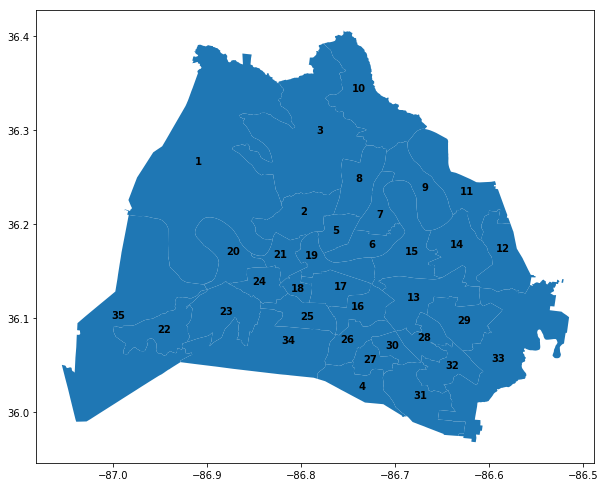

In [59]:
fig, ax = plt.subplots(figsize = (10,10))
council_districts.plot(ax = ax)
for idx, row in council_districts.iterrows():
    plt.annotate(s=row['district'], xy=row['coords'],
                 horizontalalignment='center', fontweight = 'bold')

Now, we need to combine this data frame with the number of homes per district.

In [60]:
homes_per_district = houses_2009.CouncilDistrict.value_counts()
homes_per_district

11    6928
33    6895
4     6856
24    6712
34    6491
25    6444
31    6383
15    6375
22    6235
35    6233
23    6190
7     6141
1     5902
12    5744
29    5677
26    5431
3     5314
8     5279
6     5200
19    4995
9     4803
13    4722
5     4510
10    4425
20    4402
2     4338
28    4305
16    4271
14    4149
21    4076
27    4012
17    3826
30    3737
18    3294
32    2971
Name: CouncilDistrict, dtype: int64

In [61]:
type(homes_per_district)

pandas.core.series.Series

In [62]:
homes_per_district = homes_per_district.reset_index()
homes_per_district.head(2)

,index,CouncilDistrict
0,11,6928
1,33,6895


In [63]:
homes_per_district.columns = ['district', 'num_homes_2009']
homes_per_district.head(2)

,district,num_homes_2009
0,11,6928
1,33,6895


In [64]:
# pd.merge(left = council_districts, right = homes_per_district)

We get an error. Pandas won't let us merge columns with different types. We can change the data type of the district column, which will allow us to merge the two dataframes.

In [65]:
council_districts.district = council_districts.district.astype(int)

In [66]:
council_districts = pd.merge(left = council_districts, right = homes_per_district)

In [67]:
type(council_districts)

geopandas.geodataframe.GeoDataFrame

When we call .plot() on a GeoDataFrame, we can create a choropleth by specifying column = <column_name>. Here, we will color by number of homes.

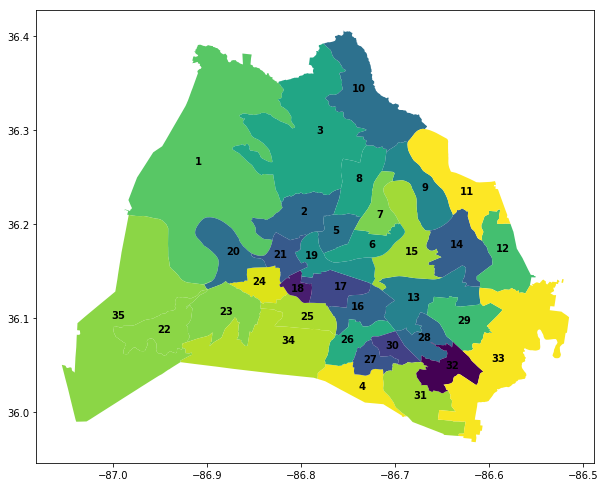

In [68]:
fig, ax = plt.subplots(figsize = (10,10))
council_districts.plot(ax = ax, column = 'num_homes_2009')
for idx, row in council_districts.iterrows():
    plt.annotate(s=row['district'], xy=row['coords'],
                 horizontalalignment='center', fontweight = 'bold');

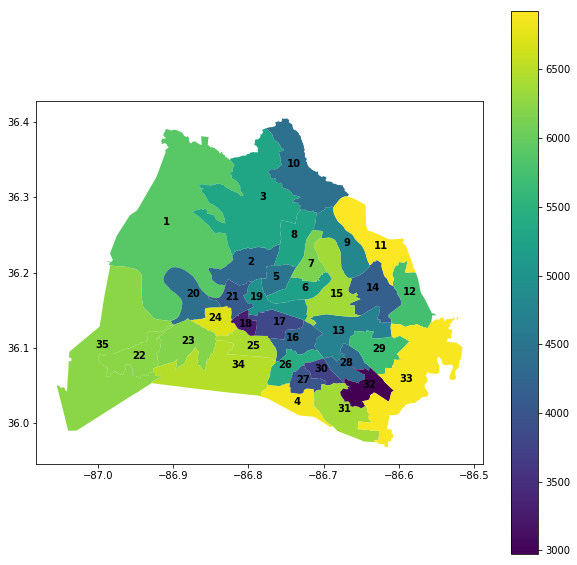

In [69]:
fig, ax = plt.subplots(figsize = (10,10))
council_districts.plot(ax = ax, column = 'num_homes_2009', legend = True)
for idx, row in council_districts.iterrows():
    plt.annotate(s=row['district'], xy=row['coords'],
                 horizontalalignment='center', fontweight = 'bold')

This colormap is not necessarily the best. We can speciy a different one using the cmap argument. See https://matplotlib.org/tutorials/colors/colormaps.html to see the colormap options. If you don't like any of those, it is also possible to create you own.

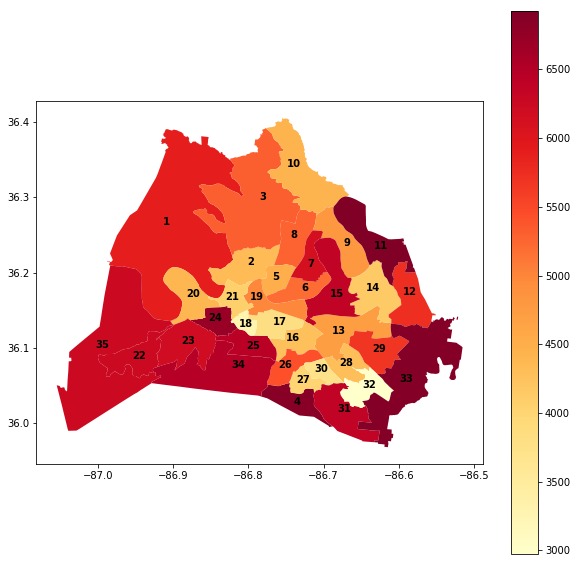

In [70]:
fig, ax = plt.subplots(figsize = (10,10))
council_districts.plot(ax = ax, column = 'num_homes_2009', legend = True, cmap = 'YlOrRd')
for idx, row in council_districts.iterrows():
    plt.annotate(s=row['district'], xy=row['coords'],
                 horizontalalignment='center', fontweight = 'bold')

We end up with an oddly-sized colormap. To modify it, we can use a couple of helper tools; namely, `make_axes_locatable` and `cm`.

In [71]:
from matplotlib import cm
from matplotlib.colors import Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable

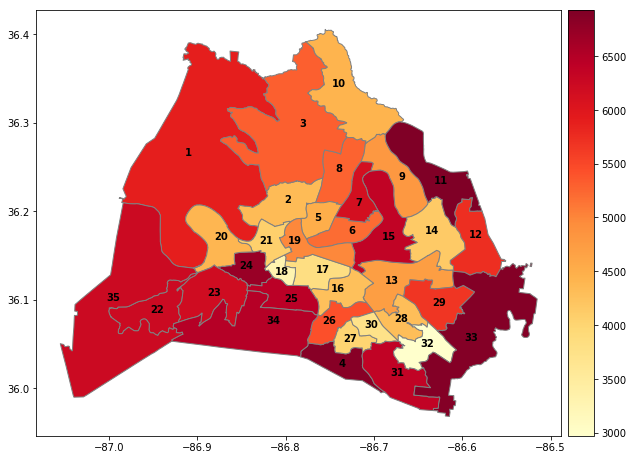

In [72]:
fig, ax = plt.subplots(figsize = (10,10))

council_districts.plot(ax = ax, column = 'num_homes_2009', cmap = 'YlOrRd', edgecolor = 'grey')

for idx, row in council_districts.iterrows():
    plt.annotate(s=row['district'], xy=row['coords'],
                 horizontalalignment='center', fontweight = 'bold', color = 'black')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

cmap = cm.ScalarMappable(
      norm = Normalize(council_districts.num_homes_2009.min(), council_districts.num_homes_2009.max()), 
      cmap = 'YlOrRd')
cmap.set_array([])    
fig.colorbar(mappable=cmap, cax = cax);

To make it more readable, let's create another helper function that will adjust the color of the district label based on its background.

In [73]:
def choose_color(num_homes):
    if num_homes < 5000: return "black"
    return "white"

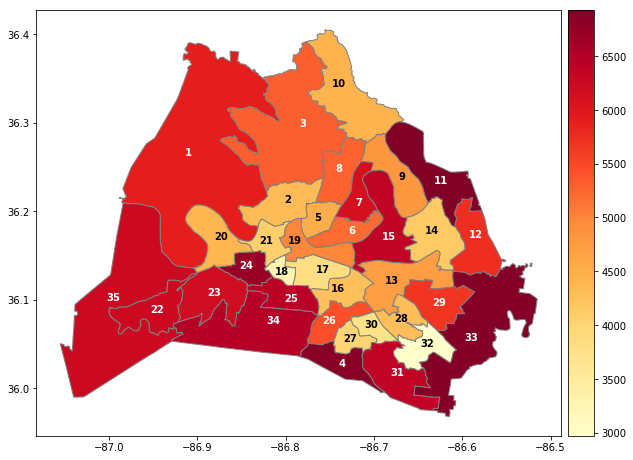

In [74]:
fig, ax = plt.subplots(figsize = (10,10))

council_districts.plot(ax = ax, column = 'num_homes_2009', cmap = 'YlOrRd', edgecolor = 'grey')

for idx, row in council_districts.iterrows():
    plt.annotate(s=row['district'], xy=row['coords'],
                 horizontalalignment='center', fontweight = 'bold', color = choose_color(row['num_homes_2009']))

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

cmap = cm.ScalarMappable(
      norm = Normalize(council_districts.num_homes_2009.min(), council_districts.num_homes_2009.max()), 
      cmap = 'YlOrRd')
cmap.set_array([])    
fig.colorbar(mappable=cmap, cax = cax);

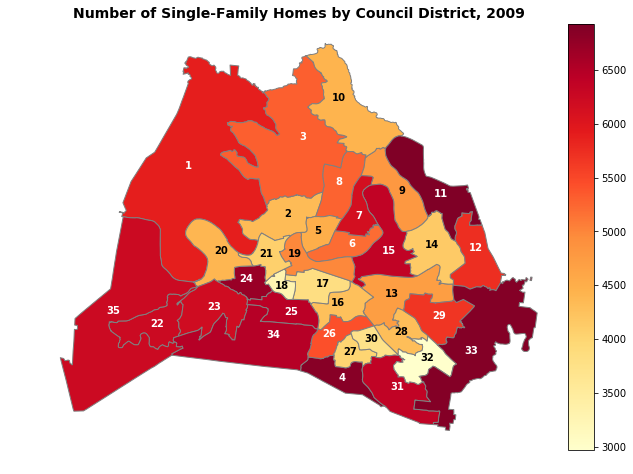

In [75]:
fig, ax = plt.subplots(figsize = (10,10))

council_districts.plot(ax = ax, column = 'num_homes_2009', cmap = 'YlOrRd', edgecolor = 'grey')

for idx, row in council_districts.iterrows():
    plt.annotate(s=row['district'], xy=row['coords'],
                 horizontalalignment='center', fontweight = 'bold', color = choose_color(row['num_homes_2009']))

plt.title('Number of Single-Family Homes by Council District, 2009', fontweight = 'bold', fontsize = 14)
plt.axis('off')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

cmap = cm.ScalarMappable(
      norm = Normalize(council_districts.num_homes_2009.min(), council_districts.num_homes_2009.max()), 
      cmap = 'YlOrRd')
cmap.set_array([])    
fig.colorbar(mappable=cmap, cax = cax);

## Adding Interstates

In [76]:
#downloaded from https://catalog.data.gov/dataset/tiger-line-shapefile-2016-nation-u-s-primary-roads-national-shapefile/resource/94e763bb-78a9-48bb-8759-2c5c98508636
interstates = gpd.read_file('data/tl_2016_us_primaryroads/tl_2016_us_primaryroads.shp')

In [77]:
interstates.head()

,LINEARID,FULLNAME,RTTYP,MTFCC,geometry
0,1105647111403,Morgan Branch Dr,M,S1100,"LINESTRING (-75.61562299999999 38.625174, -75...."
1,1103662626368,Biddle Pike,M,S1100,"LINESTRING (-84.56701699999999 38.360526, -84...."
2,1103662626717,Cincinnati Pike,M,S1100,"LINESTRING (-84.568051 38.348926, -84.56800899..."
3,1105056901124,I- 405,I,S1100,"LINESTRING (-122.679601 45.54082199999999, -12..."
4,1105056901128,I- 405,I,S1100,"LINESTRING (-122.670959 45.506849, -122.671025..."


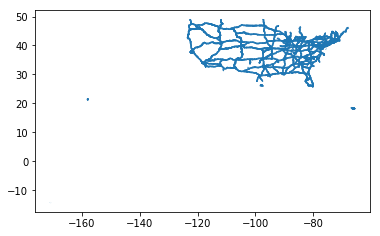

In [78]:
interstates.plot()

GeoDataFrames come equipped with a coordinate reference system, or crs. These have to do with the particular projection used to create the geometries.

In [79]:
print(interstates.crs)
print(council_districts.crs)

{'init': 'epsg:4269'}
{'init': 'epsg:4326'}


We can convert the crs using the `to_crs()` method.

In [80]:
interstates = interstates.to_crs(council_districts.crs)

Now we can narrow our interstates GeoDataFrame down to just those that intersect the council districts, using a spatial join.

In [81]:
interstates = gpd.sjoin(interstates, council_districts, how="inner", op='intersects')

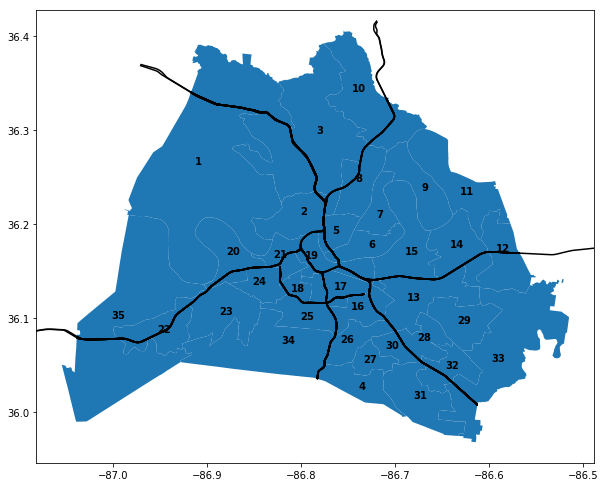

In [82]:
fig, ax = plt.subplots(figsize = (10,10))
council_districts.plot(ax = ax)
xlims = plt.xlim()
ylims = plt.ylim()
for idx, row in council_districts.iterrows():
    plt.annotate(s=row['district'], xy=row['coords'],
                 horizontalalignment='center', fontweight = 'bold')
interstates.plot(color = 'black', ax = ax)
plt.xlim(xlims)
plt.ylim(ylims);

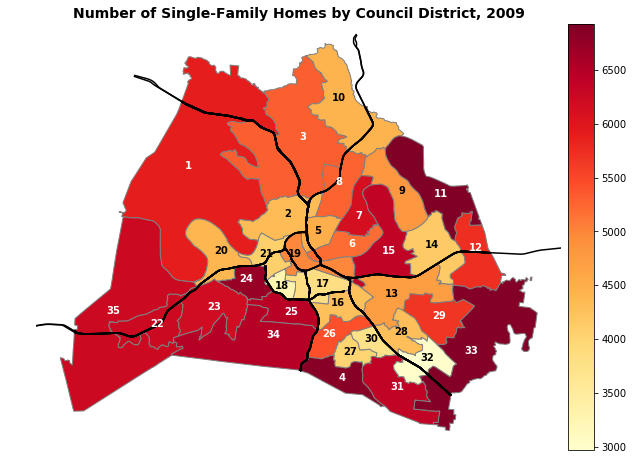

In [83]:
fig, ax = plt.subplots(figsize = (10,10))

council_districts.plot(ax = ax, column = 'num_homes_2009', cmap = 'YlOrRd', edgecolor = 'grey')

xlims = plt.xlim()
ylims = plt.ylim()

interstates.plot(color = 'black', ax = ax)
plt.xlim(xlims)
plt.ylim(ylims)


for idx, row in council_districts.iterrows():
    plt.annotate(s=row['district'], xy=row['coords'],
                 horizontalalignment='center', fontweight = 'bold', color = choose_color(row['num_homes_2009']))

plt.title('Number of Single-Family Homes by Council District, 2009', fontweight = 'bold', fontsize = 14)
plt.axis('off')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

cmap = cm.ScalarMappable(
      norm = Normalize(council_districts.num_homes_2009.min(), council_districts.num_homes_2009.max()), 
      cmap = 'YlOrRd')
cmap.set_array([])    
fig.colorbar(mappable=cmap, cax = cax); 

**Exercise:** Create a choropleth showing the average square footage per district in 2009.  

Hint: to calculate the average finished area per district, you can use `houses_2009.groupby('CouncilDistrict').FinishedArea.mean()`.

In [84]:
council_districts = pd.merge(left = council_districts, right = houses_2009.groupby('CouncilDistrict').FinishedArea.mean().reset_index().rename(columns = {'CouncilDistrict': 'district'}))

In [85]:
def choose_color_sf(area):
    if area > 2500: return 'white'
    return 'black'

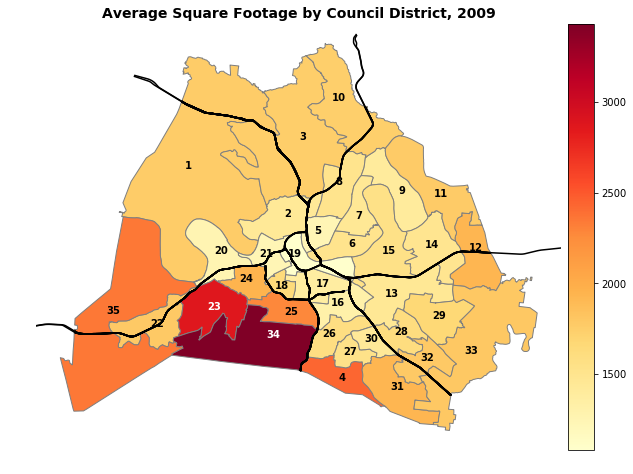

In [86]:
fig, ax = plt.subplots(figsize = (10,10))

council_districts.plot(ax = ax, column = 'FinishedArea', cmap = 'YlOrRd', edgecolor = 'grey')
xlims = plt.xlim()
ylims = plt.ylim()
interstates.plot(color = 'black', ax = ax)
plt.xlim(xlims)
plt.ylim(ylims)
for idx, row in council_districts.iterrows():
    plt.annotate(s=row['district'], xy=row['coords'],
                 horizontalalignment='center', fontweight = 'bold', color = choose_color_sf(row['FinishedArea']))

plt.title('Average Square Footage by Council District, 2009', fontweight = 'bold', fontsize = 14)
plt.axis('off')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

cmap = cm.ScalarMappable(
      norm = Normalize(council_districts.FinishedArea.min(), council_districts.FinishedArea.max()), 
      cmap = 'YlOrRd')
cmap.set_array([])    
fig.colorbar(mappable=cmap, cax = cax); 

### Part 4: Adding Interactivity with ipywidgets

What if we want to see how this changes over time?

In [87]:
homes_per_district_2013 = pd.DataFrame(houses_2013.CouncilDistrict.value_counts().sort_values()).reset_index()
homes_per_district_2013.columns = ['district', 'num_homes_2013']

homes_per_district_2017 = pd.DataFrame(houses_2017.CouncilDistrict.value_counts().sort_values()).reset_index()
homes_per_district_2017.columns = ['district', 'num_homes_2017']

**Exercise:** Merge homes_per_district_2013 and homes_per_district_2017 into the council_districts DataFrame.  
Hint: you may either have to do this in two steps or to use nested calls.

In [88]:
council_districts = pd.merge(left = pd.merge(left = council_districts, right = homes_per_district_2013), right = homes_per_district_2017)

**Exercise:** Create a function which takes as input a year and produces a plot of number of homes per district for that year.

In [89]:
def generate_map(year):
    year = str(year)
    fig, ax = plt.subplots(figsize = (10,10))
    column = 'num_homes_' + year
    
    council_districts.plot(ax = ax, column = column, cmap = 'YlOrRd', edgecolor = 'grey')
    
    xlims = plt.xlim()
    ylims = plt.ylim()
    interstates.plot(color = 'black', ax = ax)
    plt.xlim(xlims)
    plt.ylim(ylims)

    for idx, row in council_districts.iterrows():
        plt.annotate(s=row['district'], xy=row['coords'],
                     horizontalalignment='center', fontweight = 'bold', color = choose_color(row[column]))

    plt.title(f'Number of Single-Family Homes by Council District, {year}', fontweight = 'bold', fontsize = 14)
    plt.axis('off')

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)

    cmap = cm.ScalarMappable(
          norm = Normalize(council_districts[column].min(), council_districts[column].max()), 
          cmap = 'YlOrRd')
    cmap.set_array([])    
    fig.colorbar(mappable=cmap, cax = cax); 

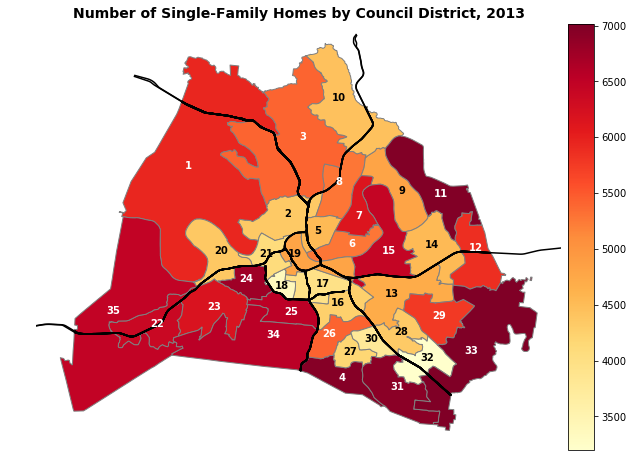

In [90]:
generate_map(2013)

Having a function to generate the map is great, but what if we didn't want to change the input parameter and rerun the cell each time we want to view a different year. Also, wouldn't it be nice to only be able to choose years for which we have data? We can accomplish this by using the `ipywidgets` library to create interactive plots.

In [91]:
from ipywidgets import interact

### `interact` as a function:

One way to use `interact` is as a function that takes as input other functions. It takes as arguments a function followed by one or more keyword arguments. These arguments should be the input variables to the passed function. 

For example, let's create an interactive widget using the squaring function. First, we need to define our function:

In [92]:
def square(x):
    return x**2

Next, pass our function in as the first argument to interact. We want to be able to modify the input variable, `x`, so we also need to specify that as an argument with a default value.

In [93]:
interact(square, x = 5);

interactive(children=(IntSlider(value=5, description='x', max=15, min=-5), Output()), _dom_classes=('widget-in…

We can also create interactive widgets for functions with more than one argument:

In [94]:
def sum_squares(x,y):
    return x**2 + y**2

In [95]:
interact(sum_squares, x = 5, y = 5);

interactive(children=(IntSlider(value=5, description='x', max=15, min=-5), IntSlider(value=5, description='y',…

We don't just have to return values - we can also create plots:

In [96]:
def plot_power_function(k):
    xs = range(50)
    dynamic_ys = [x ** k for x in xs]
    plt.plot(xs, dynamic_ys)

interact(plot_power_function, k = [1/4,1/3,1/2,1,2,3,4]);

interactive(children=(Dropdown(description='k', options=(0.25, 0.3333333333333333, 0.5, 1, 2, 3, 4), value=0.2…

**Exercise:** Make the generate_map function interactive, allowing the user to select the year they want to plot.

In [97]:
@interact(year = ['2009', '2013', '2017'])
def generate_map(year):
    fig, ax = plt.subplots(figsize = (10,10))
    column = 'num_homes_' + year
    

    council_districts.plot(ax = ax, column = column, cmap = 'YlOrRd', edgecolor = 'grey')
    
    xlims = plt.xlim()
    ylims = plt.ylim()
    interstates.plot(color = 'black', ax = ax)
    plt.xlim(xlims)
    plt.ylim(ylims)

    for idx, row in council_districts.iterrows():
        plt.annotate(s=row['district'], xy=row['coords'],
                     horizontalalignment='center', fontweight = 'bold', color = choose_color(row[column]))

    plt.title(f'Number of Single-Family Homes by Council District, {year}', fontweight = 'bold', fontsize = 14)
    plt.axis('off')

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)

    cmap = cm.ScalarMappable(
          norm = Normalize(council_districts[column].min(), council_districts[column].max()), 
          cmap = 'YlOrRd')
    cmap.set_array([])    
    fig.colorbar(mappable=cmap, cax = cax);   

interactive(children=(Dropdown(description='year', options=('2009', '2013', '2017'), value='2009'), Output()),…

This is pretty good, but notice how the colorscale changes across years. To make it easier to compare, it would be useful to have a fixed colorscale. To accomplish this, we can add the vmin and vmax arguments. Also, we need to redefine our choose_color function to accomodate the expanded colorscale.

In [98]:
def choose_color(num_homes, vmin, vmax):
    if num_homes < (vmin + vmax) / 2: return "black"
    return "white"

In [99]:
vmin = council_districts[['num_homes_2009', 'num_homes_2013', 'num_homes_2017']].values.min()
vmax = council_districts[['num_homes_2009', 'num_homes_2013', 'num_homes_2017']].values.max()

@interact(year = ['2009', '2013', '2017'])
def generate_map(year):
    fig, ax = plt.subplots(figsize = (10,10))
    column = 'num_homes_' + year
    

    council_districts.plot(ax = ax, column = column, cmap = 'YlOrRd', edgecolor = 'grey', vmin = vmin, vmax = vmax)

    xlims = plt.xlim()
    ylims = plt.ylim()
    interstates.plot(color = 'black', ax = ax)
    plt.xlim(xlims)
    plt.ylim(ylims)
    
    for idx, row in council_districts.iterrows():
        plt.annotate(s=row['district'], xy=row['coords'],
                     horizontalalignment='center', fontweight = 'bold', color = choose_color(row[column], vmin, vmax))

    plt.title(f'Number of Single-Family Homes by Council District, {year}', fontweight = 'bold', fontsize = 14)
    plt.axis('off')

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)

    cmap = cm.ScalarMappable(
          norm = Normalize(vmin, vmax), 
          cmap = 'YlOrRd')
    cmap.set_array([])    
    fig.colorbar(mappable=cmap, cax = cax);   

interactive(children=(Dropdown(description='year', options=('2009', '2013', '2017'), value='2009'), Output()),…

## Analyzing changes in single-family housing supply

**Exercise:** Create two new columns in the council_districts DataFrame, calculating the absolute and relative change in number of single-family homes from 2009 to 2017.

In [100]:
council_districts.head(1)

,first_name,email,res_phone,bus_phone,last_name,position,district,geometry,coords,lng,lat,num_homes_2009,FinishedArea,num_homes_2013,num_homes_2017
0,Nick,nick.leonardo@nashville.gov,615-509-6334,615-862-6780,Leonardo,Council Member,1,(POLYGON ((-86.90738248774342 36.3905151283193...,"(-86.90970241884453, 36.26327799986527)",NaN,NaN,5902,1765.986845,5951,6049


In [101]:
council_districts['absolute_change'] = council_districts.num_homes_2017 - council_districts.num_homes_2009
council_districts['relative_change'] = 100 * council_districts.absolute_change / council_districts.num_homes_2009

We can find the districts which had the largest and smallest change in housing supply by using the `sort_values()` method.

In [102]:
council_districts[['district', 'absolute_change']].sort_values('absolute_change').head()

,district,absolute_change
5,13,-12
11,26,4
2,8,14
27,30,43
8,16,46


In [103]:
council_districts[['district', 'absolute_change']].sort_values('absolute_change', ascending = False).head()

,district,absolute_change
28,31,1666
32,33,1205
17,17,1113
6,14,882
29,32,823


In [104]:
council_districts[['district', 'relative_change']].sort_values('relative_change', ascending = False).head()

,district,relative_change
17,17,29.090434
29,32,27.701111
28,31,26.100580
6,14,21.258134
32,33,17.476432


**Exercise:** Create an interactive plot showing absolute and relative change in the number of single-family homes by district.

In [105]:
@interact(type = ['absolute', 'relative'])
def generate_map(type):
    fig, ax = plt.subplots(figsize = (10,10))
    column = type + '_change'
    
    council_districts.plot(ax = ax, column = column, cmap = 'YlOrRd', edgecolor = 'grey')

    xlims = plt.xlim()
    ylims = plt.ylim()
    
    interstates.plot(color = 'black', ax = ax)
    plt.xlim(xlims)
    plt.ylim(ylims)
    
    vmin = council_districts[column].min()
    vmax = council_districts[column].max()
    
    for idx, row in council_districts.iterrows():
        plt.annotate(s=row['district'], xy=row['coords'],
                     horizontalalignment='center', fontweight = 'bold', color = choose_color(row[column], vmin, vmax))

    plt.title(type[0].upper() + type[1:] + ' Change in Number of Single-Family Homes, 2009-2017', fontweight = 'bold', fontsize = 14)
    plt.axis('off')

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)

    cmap = cm.ScalarMappable(
          norm = Normalize(vmin, vmax), 
          cmap = 'YlOrRd')
    cmap.set_array([])    
    fig.colorbar(mappable=cmap, cax = cax);   

interactive(children=(Dropdown(description='type', options=('absolute', 'relative'), value='absolute'), Output…

### Part 5: Analyzing Building Permits and Folium Maps

We will be using a dataset of building permits issued obtained from https://data.nashville.gov/Licenses-Permits/Building-Permits-Issued/3h5w-q8b7

In [106]:
permits = pd.read_csv('data/Building_Permits_Issued.csv')

/home/michael/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [107]:
permits.shape

(34587, 20)

In [108]:
permits.columns

Index(['Permit #', 'Permit Type Description', 'Permit Subtype Description',
       'Parcel', 'Date Entered', 'Date Issued', 'Const. Cost', 'Address',
       'City', 'State', 'Zip', 'Subdivision/Lot', 'Contact', 'Permit Type',
       'Permit Subtype', 'IVR Trk#', 'Purpose', 'Council Dist', 'Census Tract',
       'Mapped Location'],
      dtype='object')

In [109]:
permits.columns = permits.columns.map(lambda x : x.replace(' ', '_'))

Use permits.info(). Notice the missing entries.

In [110]:
permits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34587 entries, 0 to 34586
Data columns (total 20 columns):
Permit_#                      34587 non-null object
Permit_Type_Description       34587 non-null object
Permit_Subtype_Description    34587 non-null object
Parcel                        34587 non-null object
Date_Entered                  34587 non-null object
Date_Issued                   34587 non-null object
Const._Cost                   34570 non-null float64
Address                       34587 non-null object
City                          34501 non-null object
State                         34501 non-null object
Zip                           34587 non-null int64
Subdivision/Lot               34587 non-null object
Contact                       34586 non-null object
Permit_Type                   34587 non-null object
Permit_Subtype                34587 non-null object
IVR_Trk#                      34587 non-null int64
Purpose                       34157 non-null object
Council_

In [111]:
permits.loc[0]

Permit_#                                                             2019039693
Permit_Type_Description                         Building Residential - Addition
Permit_Subtype_Description                              Single Family Residence
Parcel                                                              13414001800
Date_Entered                                                         07/05/2019
Date_Issued                                                          07/05/2019
Const._Cost                                                               20000
Address                                                       3336  JOHNAKIN DR
City                                                                  NASHVILLE
State                                                                        TN
Zip                                                                       37211
Subdivision/Lot                                       LOT 60 SEC 3 LUNA HEIGHTS
Contact                                 

Let's find the earliest date in our dataset.

In [112]:
permits.Date_Entered.min()

'01/02/2017'

Pandas has read in our date columns as objects rather than dates. We can convert them by using the pandas `to_datetime` function.

In [113]:
permits.Date_Entered = pd.to_datetime(permits.Date_Entered)
permits.Date_Issued = pd.to_datetime(permits.Date_Issued)

In [114]:
print(permits.Date_Entered.min())
print(permits.Date_Issued.min())

2008-03-13 00:00:00
2016-07-05 00:00:00


Not only does converting to datetime format allow us to correctly find the minimum, but we can also do things like extract the month or year or each date.

In [115]:
permits.Date_Entered.dt.month.head()

0    7
1    7
2    7
3    3
4    6
Name: Date_Entered, dtype: int64

We can also do arithmetic on datetime objects. For example, we can find the difference between two datetime objects.

**Exercise:** Create a new columns, called 'Waiting_Time' that finds the difference between when a permit was entered and when it was issued.

In [116]:
permits['Waiting_Time'] = permits.Date_Issued - permits.Date_Entered
permits.Waiting_Time.head()

0     0 days
1     0 days
2     0 days
3   108 days
4    11 days
Name: Waiting_Time, dtype: timedelta64[ns]

In [117]:
permits.Waiting_Time.describe()

count                      34587
mean     28 days 15:32:16.299765
std      76 days 07:30:44.694096
min              0 days 00:00:00
25%              0 days 00:00:00
50%              6 days 00:00:00
75%             24 days 00:00:00
max           3371 days 00:00:00
Name: Waiting_Time, dtype: object

In [118]:
permits.Permit_Type_Description.unique()

array(['Building Residential - Addition', 'Building Residential - Rehab',
       'Building Use & Occupancy', 'Building Commercial - New',
       'Building Commercial - Rehab', 'Building Demolition Permit',
       'Building Residential - New', 'Building Sign Permit',
       'Building Residential - Amend Permit',
       'Building Residential - Roofing / Siding',
       'Building Commercial - Addition',
       'Building Commercial - Tenant Finish Out',
       'Building Commercial - Structural Frame',
       'Building Tree Removal Permit',
       'Building Commercial - Fire Damage', 'Building Commercial - Shell',
       'Building Commercial - Roofing / Siding',
       'Building Residential - Fire Damage',
       'Building Commercial - Foundation',
       'Building Residential - Change Contractor',
       'Building Moving Permit',
       'Building Residential - Tenant Finish Out',
       'Building Residential - Foundation',
       'Building Residential - Storm Damage', 'Building Blasting Pe

In [119]:
permits.loc[permits.Permit_Type_Description == 'Building Demolition Permit']['Permit_Subtype_Description'].unique()

array(['Demolition Permit - Commercial',
       'Demolition Permit - Residential',
       'Demo Permit - Residential Accessory', 'Single Family Residence',
       'Multifamily, Apt / Twnhome > 5 Unit Bldg'], dtype=object)

In [120]:
len(permits.loc[(permits.Permit_Subtype_Description == 'Demolition Permit - Residential') &
               (permits.Permit_Type_Description == 'Building Demolition Permit')])

2477

**Exercise:** Create a dataframe, called `res_demo` that contains all Building Demolition Permits that subtype either 'Demolition Permit - Residential' or 'Single Family Residence'.

In [121]:
res_demo = permits.loc[(permits.Permit_Type_Description == 'Building Demolition Permit') &
                       ((permits.Permit_Subtype_Description == 'Demolition Permit - Residential') | 
                        (permits.Permit_Subtype_Description == 'Single Family Residence'))]

In [122]:
res_demo.head(1)

,Permit_#,Permit_Type_Description,Permit_Subtype_Description,Parcel,Date_Entered,Date_Issued,Const._Cost,Address,City,State,...,Subdivision/Lot,Contact,Permit_Type,Permit_Subtype,IVR_Trk#,Purpose,Council_Dist,Census_Tract,Mapped_Location,Waiting_Time
28,2019035697,Building Demolition Permit,Demolition Permit - Residential,08115015200,2019-06-17,2019-07-03,4500.0,1826 KNOWLES ST,NASHVILLE,TN,...,"PT LOT 39 J M, T J & G W HARDING ADDITION",EASTEND CONTRACTING LLC,CADM,CAZ01A001,3681631,to demolish existing single family residence. ...,21.0,37013900.0,"1826 KNOWLES ST\nNASHVILLE, TN 37208\n(36.1720...",16 days


In [123]:
council_districts = pd.merge(council_districts, res_demo.Council_Dist.value_counts().reset_index().rename(columns = {'index': 'district', 'Council_Dist': 'num_demo'}))

In [124]:
council_districts.head()

,first_name,email,res_phone,bus_phone,last_name,position,district,geometry,coords,lng,lat,num_homes_2009,FinishedArea,num_homes_2013,num_homes_2017,absolute_change,relative_change,num_demo
0,Nick,nick.leonardo@nashville.gov,615-509-6334,615-862-6780,Leonardo,Council Member,1,(POLYGON ((-86.90738248774342 36.3905151283193...,"(-86.90970241884453, 36.26327799986527)",NaN,NaN,5902,1765.986845,5951,6049,147,2.490681,21
1,DeCosta,decosta.hastings@nashville.gov,615-779-1565,615-862-6780,Hastings,Council Member,2,(POLYGON ((-86.75902399986667 36.2309080000732...,"(-86.79713738920347, 36.209998499786956)",NaN,NaN,4338,1441.803463,4355,4560,222,5.117566,138
2,Nancy,nancy.vanreece@nashville.gov,615-576-0488,615-862-6780,VanReece,Council Member,8,(POLYGON ((-86.72850199989709 36.2832840002146...,"(-86.73924255649486, 36.24531199982642)",NaN,NaN,5279,1511.065349,5281,5293,14,0.265202,53
3,Bill,bill.pridemore@nashville.gov,615-915-1419,615-862-6780,Pridemore,Council Member,9,(POLYGON ((-86.68680500011935 36.2867050001350...,"(-86.66879039599107, 36.235620999835525)",-86.66879,36.235621,4803,1404.820110,4818,4892,89,1.853009,49
4,Robert,robert.swope@nashville.gov,615-308-0577,615-862-6780,Swope,Council Member,4,(POLYGON ((-86.74488864807594 36.0531632050230...,"(-86.73590653419714, 36.02409350009242)",NaN,NaN,6856,2438.335465,6964,7174,318,4.638273,8


In [125]:
permits.loc[permits.Permit_Type_Description == 'Building Residential - New'].Permit_Subtype_Description.unique()

array(['Accessory Structure, Garage', 'Multifamily, Townhome',
       'Single Family Residence', 'Accessory Structure, Carport',
       'Detached Accessory Dwelling Unit',
       'Multifamily, Tri-Plex, Quad, Apartments',
       'Accessory Structure, Shed / Storage Bldg', 'Duplex',
       'Mobile Home Dwelling', 'Multifamily, Condominium 3&4 Unit Bldg',
       'Multifamily, Apt / Twnhome > 5 Unit Bldg', 'Accessory Apartment',
       'Master Permit Application',
       'Multifamily, Condominium > 5 Unit Bldg',
       'Leasing / Sales Office, Other', 'Accessory Structure, Pools',
       'Home Occupation, Single Family Residence',
       'General Office, Professional Services'], dtype=object)

In [126]:
res_new = permits.loc[(permits.Permit_Subtype_Description == 'Single Family Residence') & (permits.Permit_Type_Description == 'Building Residential - New')]

In [127]:
council_districts = pd.merge(council_districts, res_new.Council_Dist.value_counts().reset_index().rename(columns = {'index': 'district', 'Council_Dist': 'num_permits'}))

In [128]:
@interact(type = ['demolition', 'new'])
def generate_map(type):
    fig, ax = plt.subplots(figsize = (10,10))
    if type == 'demolition' : 
        column = 'num_demo'
        title = 'Demolition Permits Issued, 2016-2019'
    else: 
        column = 'num_permits'
        title = 'Construction Permits Issued, 2016-2019'
    
    council_districts.plot(ax = ax, column = column, cmap = 'YlOrRd', edgecolor = 'grey')

    xlims = plt.xlim()
    ylims = plt.ylim()
    
    interstates.plot(color = 'black', ax = ax)
    plt.xlim(xlims)
    plt.ylim(ylims)
    
    vmin = council_districts[column].min()
    vmax = council_districts[column].max()
    
    for idx, row in council_districts.iterrows():
        plt.annotate(s=row['district'], xy=row['coords'],
                     horizontalalignment='center', fontweight = 'bold', color = choose_color(row[column], vmin, vmax))

    plt.title(title, fontweight = 'bold', fontsize = 14)
    plt.axis('off')

    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)

    cmap = cm.ScalarMappable(
          norm = Normalize(vmin, vmax), 
          cmap = 'YlOrRd')
    cmap.set_array([])    
    fig.colorbar(mappable=cmap, cax = cax);   

interactive(children=(Dropdown(description='type', options=('demolition', 'new'), value='demolition'), Output(…

Not only do we have council district and address information for the building permits, but we also have coordinates.

In [129]:
print(res_demo.loc[28, 'Mapped_Location'])

1826 KNOWLES ST
NASHVILLE, TN 37208
(36.172064, -86.809857)


**Exercise:** Create new columns in the res_demo and res_new DataFrames, called 'coordinates', that is obtained by extracting the coordinates from the Mapped_Location column. 

**Hint:** We can divide a string into a list, by using the `.split` method.

In [130]:
'Here is a sentence.'.split(' ')

['Here', 'is', 'a', 'sentence.']

In [131]:
res_demo['coordinates'] = res_demo['Mapped_Location'].str.split('\n').apply(lambda x : x[-1])
res_new['coordinates'] = res_new['Mapped_Location'].str.split('\n').apply(lambda x : x[-1])

/home/michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


When we apply a string split method, we end up with strings. What we really need are tuples. We can do this conversion using `eval`.

In [132]:
eval(res_demo.coordinates.loc[28])

(36.172064, -86.809857)

Unfortunately, not all of the permits actually had coordinates attached, so we will get an error if we try to apply this to all rows of our dataset. We can fix this by using a `try`, `except` block to catch errors.

In [133]:
def make_coordinates(coordinates):
    try:
        return eval(coordinates)
    except:
        pass

In [134]:
res_demo.coordinates = res_demo.coordinates.apply(make_coordinates)

/home/michael/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [135]:
res_demo = res_demo.dropna(subset=['coordinates'])

In [136]:
res_new.coordinates = res_new.coordinates.apply(make_coordinates)
res_new = res_new.dropna(subset=['coordinates'])

/home/michael/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


For more elaborate maps, we can use the `folium` library, which makes use of leafelet.js.

In [137]:
import folium

In [ ]:
map = folium.Map(location= [36.1612, -86.7775] , zoom_start=11)
display(map)

In [139]:
res_demo.columns

Index(['Permit_#', 'Permit_Type_Description', 'Permit_Subtype_Description',
       'Parcel', 'Date_Entered', 'Date_Issued', 'Const._Cost', 'Address',
       'City', 'State', 'Zip', 'Subdivision/Lot', 'Contact', 'Permit_Type',
       'Permit_Subtype', 'IVR_Trk#', 'Purpose', 'Council_Dist', 'Census_Tract',
       'Mapped_Location', 'Waiting_Time', 'coordinates'],
      dtype='object')

Now, we need to place a marker on our map for each row in the dataset.

One way to access the rows in a dataframe one at a time is by using the `.iterrows()`, method, which produces a generator object. This is an object that we can iterate through.

In [140]:
rows = res_demo.iterrows()

In [141]:
next(rows)

(28,
 Permit_#                                                             2019035697
 Permit_Type_Description                              Building Demolition Permit
 Permit_Subtype_Description                      Demolition Permit - Residential
 Parcel                                                              08115015200
 Date_Entered                                                2019-06-17 00:00:00
 Date_Issued                                                 2019-07-03 00:00:00
 Const._Cost                                                                4500
 Address                                                        1826  KNOWLES ST
 City                                                                  NASHVILLE
 State                                                                        TN
 Zip                                                                       37208
 Subdivision/Lot                       PT LOT 39 J M, T J & G W HARDING ADDITION
 Contact               

Notice that this returns a tuple of index, values.

We can also iterate through all rows in one call:

In [142]:
for idx, row in res_demo.iterrows():
    print(idx)

28
42
47
56
57
59
60
62
65
76
86
114
120
147
163
191
194
222
239
287
300
302
309
338
363
410
415
428
444
448
449
452
469
477
488
495
496
500
519
520
525
537
570
591
614
627
632
640
642
648
650
653
656
661
662
748
771
778
783
790
800
813
828
838
852
868
869
871
893
915
919
921
930
935
958
961
963
969
972
981
990
994
1012
1013
1033
1040
1041
1043
1045
1057
1065
1067
1071
1075
1080
1088
1090
1116
1138
1186
1201
1259
1312
1319
1328
1346
1347
1376
1382
1430
1467
1476
1492
1494
1527
1530
1554
1565
1605
1615
1618
1625
1629
1654
1668
1684
1686
1733
1756
1781
1783
1797
1807
1868
1874
1883
1900
1914
1925
1933
1943
1956
1958
2013
2028
2032
2037
2046
2078
2092
2122
2149
2156
2165
2169
2196
2232
2255
2273
2275
2284
2291
2307
2310
2317
2330
2349
2366
2397
2402
2433
2445
2449
2478
2488
2525
2549
2553
2556
2560
2565
2569
2572
2580
2589
2592
2595
2600
2671
2684
2686
2710
2711
2721
2746
2753
2787
2799
2843
2869
2874
2893
2985
3013
3016
3074
3078
3083
3095
3117
3121
3140
3148
3172
3173
3175
3181
3189
319

22727
22729
22749
22756
22759
22764
22766
22780
22791
22796
22798
22831
22890
22891
22904
22911
22929
22931
22944
22946
22963
22972
22976
22977
22980
23007
23010
23012
23015
23052
23058
23106
23108
23163
23164
23179
23190
23217
23232
23240
23244
23248
23255
23263
23277
23278
23281
23286
23303
23305
23308
23310
23312
23347
23352
23362
23393
23436
23438
23458
23469
23490
23507
23510
23521
23526
23557
23595
23596
23599
23638
23644
23714
23726
23739
23740
23741
23743
23744
23746
23764
23770
23788
23790
23809
23823
23846
23892
23900
23915
23952
24000
24024
24035
24056
24057
24073
24086
24102
24105
24109
24112
24120
24126
24131
24142
24143
24151
24161
24195
24214
24216
24228
24236
24247
24248
24258
24292
24293
24299
24305
24316
24343
24360
24368
24376
24379
24381
24393
24431
24435
24455
24456
24474
24476
24491
24551
24568
24571
24572
24579
24580
24582
24587
24608
24610
24639
24649
24671
24699
24723
24763
24812
24816
24823
24830
24834
24854
24855
24866
24872
24877
24879
24884
24896
24897
2490

In [ ]:
map = folium.Map(location= [36.1612, -86.7775] , zoom_start=11)
for idx, row in res_demo.loc[res_demo.Council_Dist == 18].iterrows():
    try: 
        marker = folium.Marker(location=row['coordinates'])
        map.add_child(marker)
    except:
        continue

display(map)

These maps with markers are good for a small amount of data, but quickly become unusable for too many points.

In [ ]:
map = folium.Map(location= [36.1612, -86.7775] , zoom_start=11)
for idx, row in res_demo.iterrows():
    try: 
        marker = folium.Marker(location=row['coordinates'])
        map.add_child(marker)
    except:
        continue

display(map)

One option is to use a MarkerCluster rather than individual markers.

In [145]:
from folium.plugins import MarkerCluster

In [ ]:
map = folium.Map(location= [36.1612, -86.7775] , zoom_start=11)
mc = MarkerCluster()
for idx, row in res_demo.iterrows():
    try: 
        mc.add_child(folium.Marker(location=row['coordinates']))
    except:
        continue
        
map.add_child(mc)

display(map)

Unfortunately, these become unusable for too many points. Another way to show the distribution of permits issued is to use a HeatMap.

In [147]:
from folium.plugins import HeatMap

In [ ]:
map = folium.Map(location= [36.1612, -86.7775] , zoom_start=11)
hm = HeatMap(data=res_new.coordinates)
map.add_child(hm)
display(map)

In [149]:
res_demo.columns

Index(['Permit_#', 'Permit_Type_Description', 'Permit_Subtype_Description',
       'Parcel', 'Date_Entered', 'Date_Issued', 'Const._Cost', 'Address',
       'City', 'State', 'Zip', 'Subdivision/Lot', 'Contact', 'Permit_Type',
       'Permit_Subtype', 'IVR_Trk#', 'Purpose', 'Council_Dist', 'Census_Tract',
       'Mapped_Location', 'Waiting_Time', 'coordinates'],
      dtype='object')

## Rebuilt Homes

**Exercies:** Create a new DataFrame, `res_merged`, by merging the res_demo and res_new DataFrames, matching houses that were demolished with ones that were built in the same location.

In [150]:
res_merged = pd.merge(left = res_demo[['Address', 'coordinates']], left_on = 'coordinates', 
                      right = res_new[['Address', 'coordinates']], right_on = 'coordinates',
                     suffixes = ['_old', '_new'])

In [151]:
res_merged.head(10)

,Address_old,coordinates,Address_new
0,1037B BATTERY LN,"(36.088779, -86.796109)",1037 BATTERY LN
1,116 CLAIBORNE ST,"(36.152545, -86.760552)",116 CLAIBORNE ST
2,1633 S OBSERVATORY DR,"(36.105054, -86.805449)",1633 S OBSERVATORY DR
3,1633 S OBSERVATORY DR,"(36.105054, -86.805449)",1633 S OBSERVATORY DR
4,2008 SHERIDAN RD,"(36.193184, -86.716445)",2008 SHERIDAN RD
5,3003 HOBBS RD,"(36.101934, -86.828953)",3003B HOBBS RD
6,3003 HOBBS RD,"(36.101934, -86.828953)",3003A HOBBS RD
7,814 WILSON BLVD,"(36.120392, -86.833877)",814 WILSON BLVD
8,2817 W KIRKWOOD AVE,"(36.12123, -86.78125)",2818 W KIRKWOOD AVE
9,2818 W KIRKWOOD AVE,"(36.12123, -86.78125)",2818 W KIRKWOOD AVE


In [152]:
res_merged.loc[res_merged.Address_old != res_merged.Address_new]

,Address_old,coordinates,Address_new
0,1037B BATTERY LN,"(36.088779, -86.796109)",1037 BATTERY LN
5,3003 HOBBS RD,"(36.101934, -86.828953)",3003B HOBBS RD
6,3003 HOBBS RD,"(36.101934, -86.828953)",3003A HOBBS RD
8,2817 W KIRKWOOD AVE,"(36.12123, -86.78125)",2818 W KIRKWOOD AVE
10,1068 ZOPHI ST,"(36.204737, -86.740108)",1068B ZOPHI ST
11,1068 ZOPHI ST,"(36.204737, -86.740108)",1068A ZOPHI ST
12,1711C 3RD AVE N,"(36.183864, -86.790384)",1711B 3RD AVE N
13,1711C 3RD AVE N,"(36.183864, -86.790384)",1711A 3RD AVE N
14,1711C 3RD AVE N,"(36.183864, -86.790384)",1711B 3RD AVE N
15,1711C 3RD AVE N,"(36.183864, -86.790384)",1711A 3RD AVE N


### Part 6: Appraisal Values

In [153]:
houses_2017.TOTALAPPR.describe()

count    1.969860e+05
mean     2.781362e+05
std      2.742975e+05
min      2.500000e+03
25%      1.497000e+05
50%      2.079000e+05
75%      3.134000e+05
max      1.149580e+07
Name: TOTALAPPR, dtype: float64

In [154]:
million_dollar_homes = houses_2017.loc[houses_2017.TOTALAPPR >= 1000000]

In [155]:
len(million_dollar_homes)

3852

In [156]:
million_dollar_homes.CouncilDistrict.value_counts()

34    1410
23    1174
25     423
24     365
18     189
19     126
11      49
17      40
35      16
4       14
21      14
1        5
6        5
10       4
31       3
7        2
15       2
32       2
22       2
12       2
3        2
9        1
33       1
26       1
Name: CouncilDistrict, dtype: int64

In [157]:
million_dollar_homes = pd.merge(council_districts[['district', 'geometry', 'coords']],
         million_dollar_homes.CouncilDistrict.value_counts().reset_index().rename(columns = {'index': 'district', 'CouncilDistrict' : 'num_homes'}),
        how = 'outer').fillna(0)

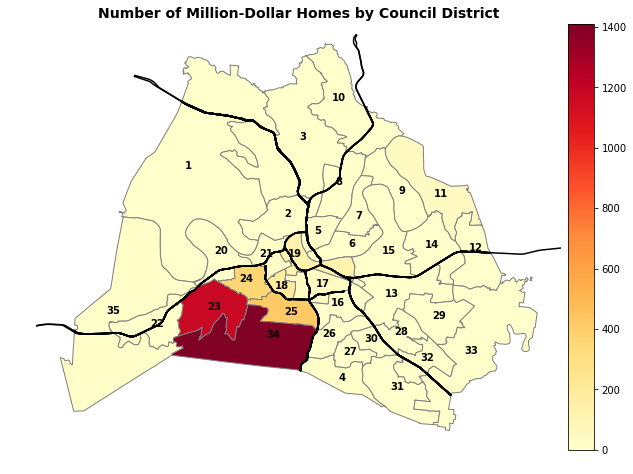

In [158]:
vmin = million_dollar_homes.num_homes.min()
vmax = million_dollar_homes.num_homes.max()

fig, ax = plt.subplots(figsize = (10,10))

million_dollar_homes.plot(ax = ax, column = 'num_homes', cmap = 'YlOrRd', edgecolor = 'grey', vmin = vmin, vmax = vmax)

xlims = plt.xlim()
ylims = plt.ylim()

interstates.plot(color = 'black', ax = ax)
plt.xlim(xlims)
plt.ylim(ylims)

for idx, row in million_dollar_homes.iterrows():
    plt.annotate(s=row['district'], xy=row['coords'],
                 horizontalalignment='center', fontweight = 'bold')

plt.title('Number of Million-Dollar Homes by Council District', fontweight = 'bold', fontsize = 14)
plt.axis('off')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

cmap = cm.ScalarMappable(
      norm = Normalize(vmin, vmax), 
      cmap = 'YlOrRd')
cmap.set_array([])    
fig.colorbar(mappable=cmap, cax = cax);   

Where are the 5 most expensive houses?

In [159]:
houses_2017.nlargest(n=5, columns='TOTALAPPR')

,APN,DistrictCode,CouncilDistrict,AddressFullAddress,AddressCity,AddressPostalCode,LAND,IMPR,TOTALAPPR,TOTALASSD,FinishedArea
126244,13006006400,BM,23,810 JACKSON BLVD,NASHVILLE,37205,1584000,9911800,11495800,2873950,12157.02051
147383,14401001000,FH,34,1358 PAGE RD,NASHVILLE,37205,1515000,9518700,11033700,2758425,20868.00000
109657,11701010500,USD,24,703 BOWLING AVE,NASHVILLE,37215,885600,9587900,10473500,2618375,12901.00000
130164,13109001000,FH,34,5309 HILLSBORO PIKE,NASHVILLE,37215,4832000,5214100,10046100,2511525,11146.00000
109273,11615000700,BM,23,530 JACKSON BLVD,NASHVILLE,37205,1704500,7504700,9209200,2302300,21014.50000


Area Median Income: 

    2009: $64,900  
    
    2013: $62,300  
    
    2017: $68,000  

Affordable Housing: Won't cost people making 60% of AMI more than 30% of their income.
    
Workforce Housing: Won't cost people making between 60% and 120% of AMI more than 30% of their income.

Let's classify these according to whether they are affordable to someone making 30%, 60%, 90%, or 120% of AMI.

In [160]:
from scipy.optimize import fsolve
import numpy as np

In [161]:
a = 0.5
R = 1.6

budget = 64900 * .3 * .3 / 12

def find_mortgage_payment(TOTALAPPR,years = 30, rate = 4, down_payment = 20):
    P = TOTALAPPR * (1 - (down_payment / 100))
    n = 12 * years
    r = rate / (100 * 12)
    M = P * (r * (1 + r)**n) / ((1 + r)**n - 1)
    return M

func = lambda value : budget - find_mortgage_payment(value) 

# Use the numerical solver to find the roots

initial_guess = 100000
print(fsolve(func, initial_guess))

budget = 62300 * .3 * .3 / 12
print(fsolve(func, initial_guess))

budget = 68000 * .3 * .3 / 12
print(fsolve(func, initial_guess))

[127444.07348885]
[122338.45575278]
[133531.54078955]


In [162]:
def classify_house(value, max_price):
    if value <= max_price:
        return 'AFF_1'
    elif value <= 2 * max_price:
        return 'AFF_2'
    elif value <= 3 * max_price:
        return 'WF_1'
    elif value <= 4 * max_price:
        return 'WF_2'
    else:
        return 'AWF'

In [163]:
houses_2009['category'] = houses_2009.TOTALAPPR.apply(lambda x: classify_house(x, 127444))
houses_2013['category'] = houses_2013.TOTALAPPR.apply(lambda x: classify_house(x, 122338))
houses_2017['category'] = houses_2017.TOTALAPPR.apply(lambda x: classify_house(x, 133531))

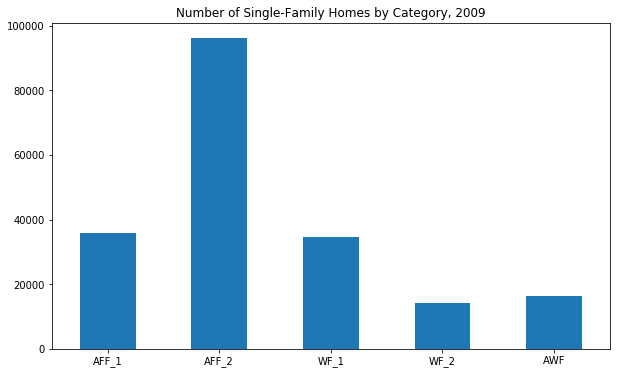

In [164]:
plt.figure(figsize = (10,6))
houses_2017.category.value_counts()[['AFF_1', 'AFF_2', 'WF_1', 'WF_2', 'AWF']].plot.bar(rot = 0)
plt.title('Number of Single-Family Homes by Category, 2009');

**TODO:** Break into bite-sized chunks

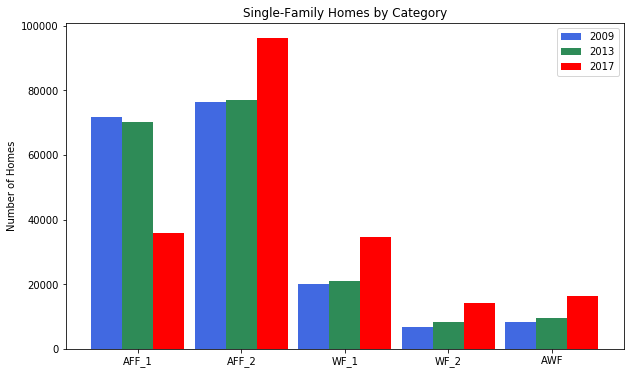

In [165]:
N = 5

ind = np.arange(N)  # the x locations for the groups
width = 0.3       # the width of the bars

fig = plt.figure(figsize = (10,6))
ax = fig.add_subplot(111)
rects1 = ax.bar(ind - width, houses_2009.category.value_counts()[['AFF_1', 'AFF_2', 'WF_1', 'WF_2', 'AWF']], 
                width, color='royalblue')

rects2 = ax.bar(ind, houses_2013.category.value_counts()[['AFF_1', 'AFF_2', 'WF_1', 'WF_2', 'AWF']], 
                width, color='seagreen')

rects3 = ax.bar(ind+width, houses_2017.category.value_counts()[['AFF_1', 'AFF_2', 'WF_1', 'WF_2', 'AWF']], 
                width, color='red') 

# add some
ax.set_ylabel('Number of Homes')
ax.set_title('Single-Family Homes by Category')
ax.set_xticks(ind)
ax.set_xticklabels( ('AFF_1', 'AFF_2', 'WF_1', 'WF_2', 'AWF') )

ax.legend( (rects1[0], rects2[0], rects3[0]), ('2009', '2013', '2017') )

plt.show();

In [166]:
AFF_1 = [(df.category.value_counts()[['AFF_1', 'AFF_2', 'WF_1', 'WF_2', 'AWF']] / len(df))['AFF_1'] for df in [houses_2009, houses_2013, houses_2017]]
AFF_2 = [(df.category.value_counts()[['AFF_1', 'AFF_2', 'WF_1', 'WF_2', 'AWF']] / len(df))['AFF_2'] for df in [houses_2009, houses_2013, houses_2017]]
WF_1 = [(df.category.value_counts()[['AFF_1', 'AFF_2', 'WF_1', 'WF_2', 'AWF']] / len(df))['WF_1'] for df in [houses_2009, houses_2013, houses_2017]]
WF_2 = [(df.category.value_counts()[['AFF_1', 'AFF_2', 'WF_1', 'WF_2', 'AWF']] / len(df))['WF_2'] for df in [houses_2009, houses_2013, houses_2017]]
AWF = [(df.category.value_counts()[['AFF_1', 'AFF_2', 'WF_1', 'WF_2', 'AWF']] / len(df))['AWF'] for df in [houses_2009, houses_2013, houses_2017]]

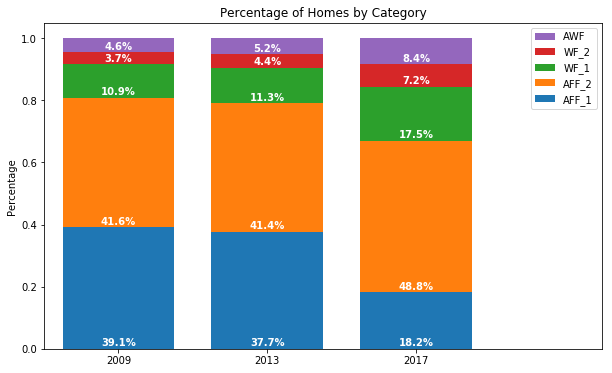

In [167]:
width = 0.75
plt.figure(figsize = (10,6))

p1 = plt.bar(range(3), AFF_1, width)
for x, y in zip(range(3), [0.01,0.01,0.01]):
    plt.text(x = x, y = y, s = "{:.1f}%".format(100*AFF_1[x]), color = 'white', ha = 'center', fontweight = 'bold')

p2 = plt.bar(range(3), AFF_2, width,bottom=AFF_1)
for x, y in zip(range(3), np.array(AFF_1) + np.array([0.01,0.01,0.01])):
    plt.text(x = x, y = y, s = "{:.1f}%".format(100*AFF_2[x]), color = 'white', ha = 'center', fontweight = 'bold')
    
p3 = plt.bar(range(3), WF_1, width, bottom = np.array(AFF_1) + np.array(AFF_2))
for x, y in zip(range(3), np.array(AFF_1) + np.array(AFF_2) + np.array([0.01,0.01,0.01])):
    plt.text(x = x, y = y, s = "{:.1f}%".format(100*WF_1[x]), color = 'white', ha = 'center', fontweight = 'bold')

p4 = plt.bar(range(3), WF_2, width, bottom = np.array(AFF_1) + np.array(AFF_2) + np.array(WF_1))
for x, y in zip(range(3), np.array(AFF_1) + np.array(AFF_2) + np.array(WF_1) + np.array([0.01,0.01,0.01])):
    plt.text(x = x, y = y, s = "{:.1f}%".format(100*WF_2[x]), color = 'white', ha = 'center', fontweight = 'bold')

p5 = plt.bar(range(3), AWF, width, bottom = np.array(AFF_1) + np.array(AFF_2) + np.array(WF_1) + np.array(WF_2))
for x, y in zip(range(3), np.array(AFF_1) + np.array(AFF_2) + np.array(WF_1) + np.array(WF_2) + np.array([0.01,0.01,0.01])):
    plt.text(x = x, y = y, s = "{:.1f}%".format(100*AWF[x]), color = 'white', ha = 'center', fontweight = 'bold')

plt.ylabel('Percentage')
plt.title('Percentage of Homes by Category')
plt.xticks(range(3), ('2009', '2013', '2017'))
plt.legend((p5[0], p4[0], p3[0], p2[0], p1[0]), ('AWF', 'WF_2', 'WF_1', 'AFF_2', 'AFF_1'))
plt.xlim(-.5, 3.25);

In [168]:
import warnings
warnings.filterwarnings('ignore')

In [169]:
@interact(district = range(1, 36))
def make_stacked_bar(district):
    
    dfs = [houses_2009.loc[houses_2009.CouncilDistrict == district], 
           houses_2013.loc[houses_2013.CouncilDistrict == district],
          houses_2017.loc[houses_2017.CouncilDistrict == district]]
    
    AFF_1 = [(df.category.value_counts()[['AFF_1', 'AFF_2', 'WF_1', 'WF_2', 'AWF']].fillna(0) / len(df))['AFF_1'] for df in dfs]
    AFF_2 = [(df.category.value_counts()[['AFF_1', 'AFF_2', 'WF_1', 'WF_2', 'AWF']].fillna(0) / len(df))['AFF_2'] for df in dfs]
    WF_1 = [(df.category.value_counts()[['AFF_1', 'AFF_2', 'WF_1', 'WF_2', 'AWF']].fillna(0) / len(df))['WF_1'] for df in dfs]
    WF_2 = [(df.category.value_counts()[['AFF_1', 'AFF_2', 'WF_1', 'WF_2', 'AWF']].fillna(0) / len(df))['WF_2'] for df in dfs]
    AWF = [(df.category.value_counts()[['AFF_1', 'AFF_2', 'WF_1', 'WF_2', 'AWF']].fillna(0) / len(df))['AWF'] for df in dfs]

    width = 0.75
    plt.figure(figsize = (10,6))
    
    def check_min(value):
        if value < 3:
            return ''
        return "{:.1f}%".format(value)

    p1 = plt.bar(range(3), AFF_1, width)
    for x, y in zip(range(3), [0.01,0.01,0.01]):
        plt.text(x = x, y = y, s = check_min(100*AFF_1[x]), color = 'white', ha = 'center', fontweight = 'bold')

    p2 = plt.bar(range(3), AFF_2, width,bottom=AFF_1)
    for x, y in zip(range(3), np.array(AFF_1) + np.array([0.01,0.01,0.01])):
        plt.text(x = x, y = y, s = check_min(100*AFF_2[x]), color = 'white', ha = 'center', fontweight = 'bold')

    p3 = plt.bar(range(3), WF_1, width, bottom = np.array(AFF_1) + np.array(AFF_2))
    for x, y in zip(range(3), np.array(AFF_1) + np.array(AFF_2) + np.array([0.01,0.01,0.01])):
        plt.text(x = x, y = y, s = check_min(100*WF_1[x]), color = 'white', ha = 'center', fontweight = 'bold')

    p4 = plt.bar(range(3), WF_2, width, bottom = np.array(AFF_1) + np.array(AFF_2) + np.array(WF_1))
    for x, y in zip(range(3), np.array(AFF_1) + np.array(AFF_2) + np.array(WF_1) + np.array([0.01,0.01,0.01])):
        plt.text(x = x, y = y, s = check_min(100*WF_2[x]), color = 'white', ha = 'center', fontweight = 'bold')

    p5 = plt.bar(range(3), AWF, width, bottom = np.array(AFF_1) + np.array(AFF_2) + np.array(WF_1) + np.array(WF_2))
    for x, y in zip(range(3), np.array(AFF_1) + np.array(AFF_2) + np.array(WF_1) + np.array(WF_2) + np.array([0.01,0.01,0.01])):
        plt.text(x = x, y = y, s = check_min(100*AWF[x]), color = 'white', ha = 'center', fontweight = 'bold')

    plt.ylabel('Percentage')
    plt.title('Percentage of Homes by Category')
    plt.xticks(range(3), ('2009', '2013', '2017'))
    plt.legend((p5[0], p4[0], p3[0], p2[0], p1[0]), ('AWF', 'WF_2', 'WF_1', 'AFF_2', 'AFF_1'))
    plt.xlim(-.5, 3.5)
    
    cd = council_districts[['district', 'geometry']]
    
    cd['chosen_district'] = 0
    cd.loc[cd.district == district, 'chosen_district'] = 1
    
    mini_map = plt.axes([.68, .3, .25, .25]) #[left, bottom, width, height]
    cd.plot(column = 'chosen_district', ax = mini_map, legend = False, edgecolor = 'black', cmap = 'binary')
    plt.axis('off')
    plt.title('District ' + str(district));

interactive(children=(Dropdown(description='district', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,…

### Part 7: Seaborn

Seaborn is a visualization library built on top of matplotlib.

In [170]:
import seaborn as sns

Seaborn gives us options to compare home appraisal values across districts or across years. For example, we can use a box plot.

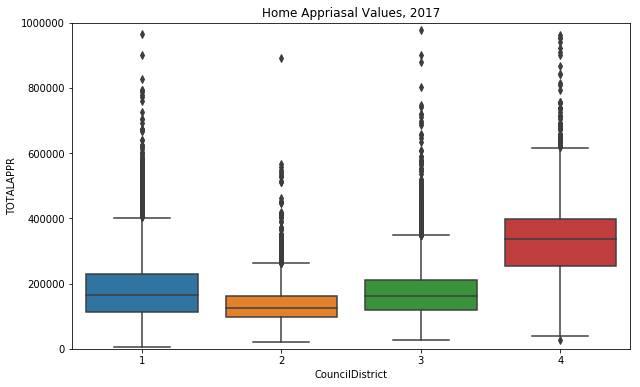

In [171]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(data = houses_2017.loc[houses_2017.CouncilDistrict.isin([1,2,3,4])], x = 'CouncilDistrict', 
            y = 'TOTALAPPR')
plt.title('Home Appriasal Values, 2017')
plt.ylim(0, 1000000);

Another option is to use a violin plot, which includes a density estimation.

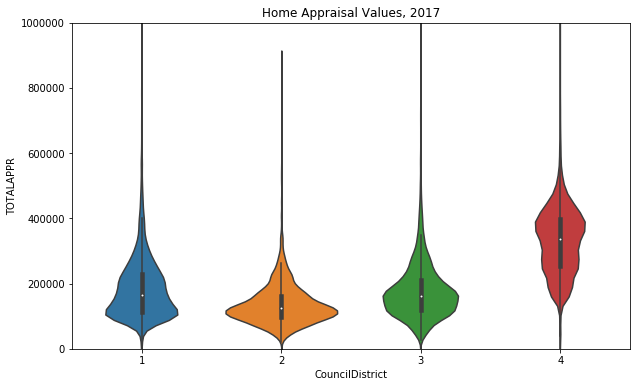

In [172]:
fig = plt.figure(figsize = (10,6))
sns.violinplot(data = houses_2017.loc[houses_2017.CouncilDistrict.isin([1,2,3,4])], x = 'CouncilDistrict', y = 'TOTALAPPR')
plt.title('Home Appraisal Values, 2017')
plt.ylim(0, 1000000);

If we want to compare across years, we can combine our three DataFrames into one, using `concat`:

In [173]:
houses_2009['year'] = 2009
houses_2013['year'] = 2013
houses_2017['year'] = 2017

In [174]:
houses = pd.concat([houses_2009, houses_2013, houses_2017])

In [175]:
houses.head()

,APN,DistrictCode,CouncilDistrict,AddressFullAddress,AddressCity,AddressPostalCode,LAND,IMPR,TOTALAPPR,TOTALASSD,FinishedArea,category,year
0,00200000300,RT,10,1012 OLD BUCK HILL RD,GOODLETTSVILLE,37072,49800.0,65700.0,115500.0,28875.0,1920.0,AFF_1,2009
1,00200000700,RT,10,1109 HIGHLAND AVE,GOODLETTSVILLE,37072,44100.0,88700.0,132800.0,33200.0,1464.0,AFF_2,2009
2,00200001001002,GSD,10,0 SPRINGFIELD HWY,GOODLETTSVILLE,37072,15000.0,137900.0,152900.0,38225.0,3539.0,AFF_2,2009
3,00200001400001,RT,10,133 B EAST END RD,GOODLETTSVILLE,37072,41100.0,27000.0,68100.0,17025.0,736.0,AFF_1,2009
4,00200001600001,RT,10,141 B EAST END RD,GOODLETTSVILLE,37072,25100.0,60900.0,86000.0,21500.0,1301.0,AFF_1,2009


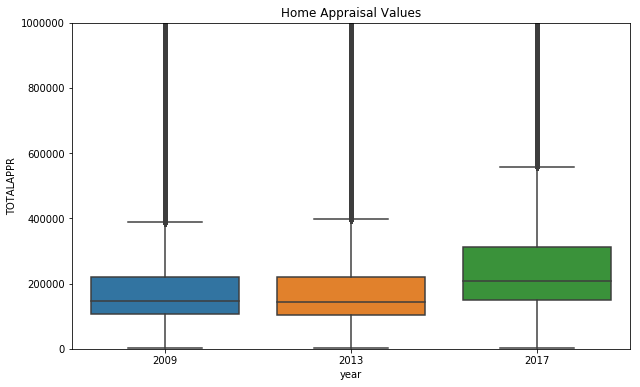

In [176]:
fig = plt.figure(figsize = (10,6))
sns.boxplot(data = houses, x = 'year', y = 'TOTALAPPR')
plt.title('Home Appraisal Values')
plt.ylim(0, 1000000);

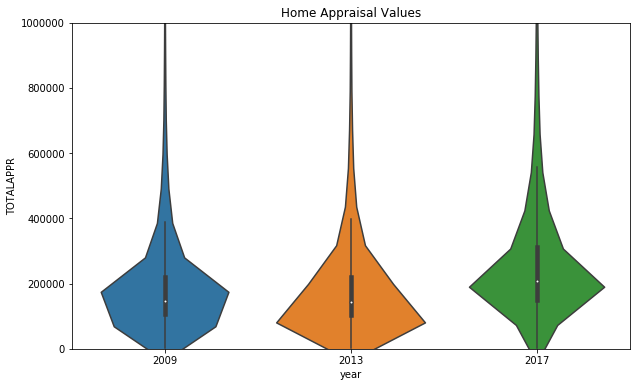

In [177]:
fig = plt.figure(figsize = (10,6))
sns.violinplot(data = houses, x = 'year', y = 'TOTALAPPR')
plt.title('Home Appraisal Values')
plt.ylim(0, 1000000);

What if we want to dynamically change the maximum value? We can use the numpy library to help us.

In [178]:
np.percentile(houses.loc[houses.CouncilDistrict == 34, 'TOTALAPPR'], 90)

1236950.0000000005

In [179]:
@interact(district = range(1,36), plot_type = ['box', 'violin'])
def plot_dist(district, plot_type):
    fig = plt.figure(figsize = (10,6))
    if plot_type == 'box':
        sns.boxplot(data = houses.loc[houses.CouncilDistrict == district], x = 'year', y = 'TOTALAPPR')
    if plot_type == 'violin':
        sns.violinplot(data = houses.loc[houses.CouncilDistrict == district], x = 'year', y = 'TOTALAPPR')
    ymax = np.percentile(houses.loc[(houses.CouncilDistrict == district) & (houses.year == 2017), 'TOTALAPPR'], 99.9)
    plt.ylim(0, ymax)
    plt.title('Total Appraised Value, District ' + str(district));

interactive(children=(Dropdown(description='district', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,…

In [180]:
cd = council_districts[['district', 'geometry']]

In [181]:
import warnings
warnings.filterwarnings('ignore')

In [182]:
@interact(district = range(1,36), plot_type = ['box', 'violin'])
def plot_dist(district, plot_type):
    fig = plt.figure(figsize = (10,6))
    if plot_type == 'box':
        sns.boxplot(data = houses.loc[houses.CouncilDistrict == district], x = 'year', y = 'TOTALAPPR')
    if plot_type == 'violin':
        sns.violinplot(data = houses.loc[houses.CouncilDistrict == district], x = 'year', y = 'TOTALAPPR')
    ymax = np.percentile(houses.loc[(houses.CouncilDistrict == district) & (houses.year == 2017), 'TOTALAPPR'], 99.9)
    plt.ylim(0, ymax)
    plt.title('Total Appraised Value, District ' + str(district))
    
    cd['chosen_district'] = 0
    cd.loc[cd.district == district, 'chosen_district'] = 1
    
    mini_map = plt.axes([.85, .3, .4, .4]) #[left, bottom, width, height]
    cd.plot(column = 'chosen_district', ax = mini_map, legend = False, edgecolor = 'black', cmap = 'binary')
    plt.axis('off')
    plt.title('District ' + str(district));

interactive(children=(Dropdown(description='district', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,…

Seaborn also provides distplots, which can do histograms or kernel density estimates, which are essentially smoothed histograms.

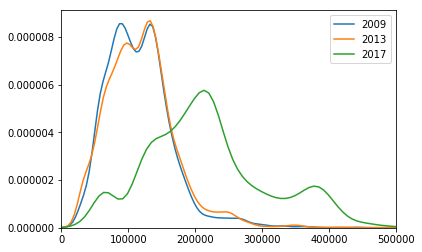

In [183]:
df = houses.loc[houses.CouncilDistrict == 20]

target_0 = df.loc[df.year == 2009]
target_1 = df.loc[df.year == 2013]
target_2 = df.loc[df.year == 2017]

sns.distplot(target_0[['TOTALAPPR']], hist=False, label = '2009')
sns.distplot(target_1[['TOTALAPPR']], hist=False, label = '2013')
g = sns.distplot(target_2[['TOTALAPPR']], hist=False, label = '2017')

g.set(xlim=(0, 500000));

In [184]:
@interact(district = range(1,36))
def make_dist_plot(district):
    plt.figure(figsize = (10,6))
    
    df = houses.loc[houses.CouncilDistrict == district]

    target_0 = df.loc[df.year == 2009]
    target_1 = df.loc[df.year == 2013]
    target_2 = df.loc[df.year == 2017]

    sns.distplot(target_0[['TOTALAPPR']], hist=False, label = '2009', kde_kws={'lw': 3})
    sns.distplot(target_1[['TOTALAPPR']], hist=False, label = '2013', kde_kws={'lw': 3})
    g = sns.distplot(target_2[['TOTALAPPR']], hist=False, label = '2017', kde_kws={'lw': 3}, color = 'purple')

    xmax = np.percentile(houses.loc[(houses.CouncilDistrict == district) & (houses.year == 2017), 'TOTALAPPR'], 95)

    g.set(xlim=(0, xmax))
    g.set(yticks = [])
    g.set(title="Distribution of Appraisal Values, District " + str(district));

interactive(children=(Dropdown(description='district', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,…

### Part 8: Plotly

`plotly` is another visualization library which allows for more dynamic, interactive graphics.

In [185]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

init_notebook_mode(connected = True)

In [186]:
@interact(district = range(1,36))
def make_plotly(district):
    ymax = np.percentile(houses.loc[(houses.CouncilDistrict == district), 'TOTALAPPR'], 99.9)
    
    trace0 = go.Box(
        y=houses.loc[(houses.CouncilDistrict == district) & (houses.year == 2009), 'TOTALAPPR'],
        name = '2009'
    )
    trace1 = go.Box(
        y=houses.loc[(houses.CouncilDistrict == district) & (houses.year == 2013), 'TOTALAPPR'],
        name = '2013'
    )
    trace2 = go.Box(
        y=houses.loc[(houses.CouncilDistrict == district) & (houses.year == 2017), 'TOTALAPPR'],
        name = '2017'
    )
    data = [trace0, trace1, trace2]
    
    layout = go.Layout(
        title = 'Assessment Values, District ' + str(district),
        yaxis=dict(
             range = [0, ymax]
        )
    )
    fig = go.Figure(data=data, layout=layout)
    
    iplot(fig)

interactive(children=(Dropdown(description='district', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,…

In [187]:
fig = {
    "data": [{
        "type": 'violin',
        "y": houses.loc[(houses.CouncilDistrict == 17) & (houses.year == 2009), 'TOTALAPPR'],
        "box": {
            "visible": True
        },
        "line": {
            "color": 'black'
        },
        "meanline": {
            "visible": True
        },
        "fillcolor": '#8dd3c7',
        "opacity": 0.6,
        "x0": '2009'
    }],
    "layout" : {
        "title": "",
        "yaxis": {
            "zeroline": False,
        }
    }
}

iplot(fig)

In [188]:
@interact(district = range(1,36))
def make_plotly(district):
    ymax = np.percentile(houses.loc[(houses.CouncilDistrict == district), 'TOTALAPPR'], 99.9)
    
    trace0 = go.Violin(
        y=houses.loc[(houses.CouncilDistrict == district) & (houses.year == 2009), 'TOTALAPPR'],
        name = '2009',
        box = {'visible' : True}
    )
    trace1 = go.Violin(
        y=houses.loc[(houses.CouncilDistrict == district) & (houses.year == 2013), 'TOTALAPPR'],
        name = '2013',
        box = {'visible': True}
    )
    trace2 = go.Violin(
        y=houses.loc[(houses.CouncilDistrict == district) & (houses.year == 2017), 'TOTALAPPR'],
        name = '2017',
        box = {'visible': True}
    )
    data = [trace0, trace1, trace2]
    
    layout = go.Layout(
        title = 'Assessment Values, District ' + str(district),
#         xaxis=go.layout.XAxis(
#             ticktext=['2009', '2013', '2017'],
#             tickvals = [0,1,2]
#         ),
        yaxis=dict(
             range = [0, ymax]
        )
    )
    fig = go.Figure(data=data, layout=layout)
    
    iplot(fig)

interactive(children=(Dropdown(description='district', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,…

In [189]:
data = houses_2009.CouncilDistrict.value_counts().reset_index().rename(columns = {'index' : 'District', 'CouncilDistrict': 'num_homes'})

iplot([go.Bar(x = data.District, y = data.num_homes)])

In [190]:
animals=['giraffes', 'orangutans', 'monkeys']

fig = go.Figure(data=[
    go.Bar(name='SF Zoo', x=animals, y=[20, 14, 23]),
    go.Bar(name='LA Zoo', x=animals, y=[12, 18, 29])],
               layout = go.Layout(barmode='stack'))
# Change the bar mode
iplot(fig)

Need: 5 lists/arrays, one for each category, divided into years.

In [191]:
counts = [[len(df.loc[df.category == cat]) for df in [houses_2009, houses_2013, houses_2017]] for cat in ['AFF_1', 'AFF_2', 'WF_1', 'WF_2', 'AWF']]

In [192]:
years = ['2009', '2013', '2017']
fig = go.Figure(data=[ go.Bar(name = cat, x = years, y = counts[i]) for i, cat in zip(range(5), ['AFF_1', 'AFF_2', 'WF_1', 'WF_2', 'AWF'])],
               layout = go.Layout(barmode='stack', xaxis = go.layout.XAxis(tickvals=[2009, 2013, 2017])),)
# Change the bar mode
iplot(fig)

In [193]:
@interact(district = range(1, 36))
def make_plot(district):
    counts = [[len(df.loc[(df.category == cat) & (df.CouncilDistrict == district)]) for df in [houses_2009, houses_2013, houses_2017]] for cat in ['AFF_1', 'AFF_2', 'WF_1', 'WF_2', 'AWF']]
    years = ['2009', '2013', '2017']
    fig = go.Figure(data=[ go.Bar(name = cat, x = years, y = counts[i]) for i, cat in zip(range(5), ['AFF_1', 'AFF_2', 'WF_1', 'WF_2', 'AWF'])],
                   layout = go.Layout(barmode='stack', xaxis = go.layout.XAxis(tickvals=[2009, 2013, 2017]), title= 'Single-Family Homes, District ' + str(district)),)
    # Change the bar mode
    iplot(fig)

interactive(children=(Dropdown(description='district', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,…

In [251]:
counts = [[len(houses_2009.loc[(houses_2009.category == cat) & (houses_2009.CouncilDistrict == district)]) for district in range(1, 36)] for cat in ['AFF_1', 'AFF_2', 'WF_1', 'WF_2', 'AWF']]

districts = list(range(1,36))
fig = go.Figure(data=[ go.Bar(name = cat, x = districts, y = counts[i]) for i, cat in zip(range(5), ['AFF_1', 'AFF_2', 'WF_1', 'WF_2', 'AWF'])],
               layout = go.Layout(barmode='stack'),)
# Change the bar mode
iplot(fig)

In [195]:
@interact(year = [2009, 2013, 2017])
def make_plot(year):
    if year == 2009: df = houses_2009
    if year == 2013: df = houses_2013
    if year == 2017: df = houses_2017
    counts = [[len(df.loc[(df.category == cat) & (df.CouncilDistrict == district)]) for district in range(1, 36)] for cat in ['AFF_1', 'AFF_2', 'WF_1', 'WF_2', 'AWF']]

    districts = list(range(1,36))
    fig = go.Figure(data=[ go.Bar(name = cat, x = districts, y = counts[i]) for i, cat in zip(range(5), ['AFF_1', 'AFF_2', 'WF_1', 'WF_2', 'AWF'])],
                   layout = go.Layout(barmode='stack', 
                                      xaxis = go.layout.XAxis(tickvals=list(range(1,36))),
                                      title= 'Single-Family Homes by District, ' + str(year)),)
    # Change the bar mode
    iplot(fig)

interactive(children=(Dropdown(description='year', options=(2009, 2013, 2017), value=2009), Output()), _dom_cl…

In [196]:
houses.head()

,APN,DistrictCode,CouncilDistrict,AddressFullAddress,AddressCity,AddressPostalCode,LAND,IMPR,TOTALAPPR,TOTALASSD,FinishedArea,category,year
0,00200000300,RT,10,1012 OLD BUCK HILL RD,GOODLETTSVILLE,37072,49800.0,65700.0,115500.0,28875.0,1920.0,AFF_1,2009
1,00200000700,RT,10,1109 HIGHLAND AVE,GOODLETTSVILLE,37072,44100.0,88700.0,132800.0,33200.0,1464.0,AFF_2,2009
2,00200001001002,GSD,10,0 SPRINGFIELD HWY,GOODLETTSVILLE,37072,15000.0,137900.0,152900.0,38225.0,3539.0,AFF_2,2009
3,00200001400001,RT,10,133 B EAST END RD,GOODLETTSVILLE,37072,41100.0,27000.0,68100.0,17025.0,736.0,AFF_1,2009
4,00200001600001,RT,10,141 B EAST END RD,GOODLETTSVILLE,37072,25100.0,60900.0,86000.0,21500.0,1301.0,AFF_1,2009


In [197]:
count_by_category = houses.groupby(['year', 'category']).APN.count().reset_index()
count_by_category

,year,category,APN
0,2009,AFF_1,71660
1,2009,AFF_2,76293
2,2009,AWF,8451
3,2009,WF_1,20043
4,2009,WF_2,6819
5,2013,AFF_1,70187
6,2013,AFF_2,77016
7,2013,AWF,9677
8,2013,WF_1,21048
9,2013,WF_2,8206


In [198]:
pivot_df = count_by_category.pivot(index='year', columns='category', values='APN')
pivot_df = pivot_df.loc[:,['AFF_1', 'AFF_2', 'WF_1', 'WF_2', 'AWF']]
pivot_df

category,AFF_1,AFF_2,WF_1,WF_2,AWF
year,,,,,
2009,71660,76293,20043,6819,8451
2013,70187,77016,21048,8206,9677
2017,35821,96061,34451,14145,16508


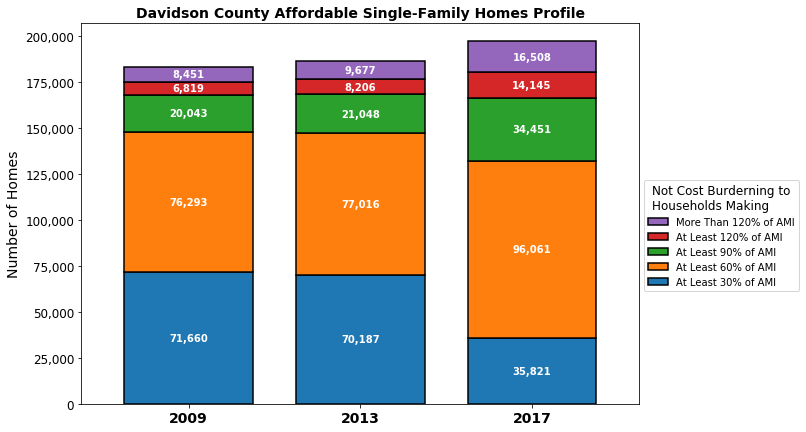

In [357]:
fig,ax = plt.subplots(figsize = (10,7))
pivot_df.plot.bar(stacked=True, ax = ax, rot = 0, width = 0.75, edgecolor = 'black',lw=1.5)
plt.title('Davidson County Affordable Single-Family Homes Profile', fontweight = 'bold', fontsize = 14)
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
plt.yticks(fontsize = 12)
plt.ylabel('Number of Homes', fontsize = 14)
plt.xticks(fontsize = 14, fontweight = 'bold')
plt.xlabel('')

rows = pivot_df.iterrows()
for i in range(3):
    values = next(rows)[1]
    heights = np.array([0] + list(values.cumsum()[:-1])) + values/2
    for height, value in zip(heights,values):
        plt.text(x = i, y = height, s = f'{value:,}', color = 'white', ha = 'center', va = 'center', fontweight = 'bold')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], 
              ['More Than 120% of AMI', 'At Least 120% of AMI', 'At Least 90% of AMI', 'At Least 60% of AMI', 'At Least 30% of AMI'], 
              bbox_to_anchor=(1, 0.6), title = 'Not Cost Burderning to\nHouseholds Making', title_fontsize = 12);

In [369]:
@interact(district = range(1,36))
def make_plot(district):
    data = houses.loc[houses.CouncilDistrict == district]
    
    count_by_category = data.groupby(['year', 'category']).APN.count().reset_index()
    
    pivot_df = count_by_category.pivot(index='year', columns='category', values='APN').fillna(0)
    pivot_df = pivot_df.loc[:,['AFF_1', 'AFF_2', 'WF_1', 'WF_2', 'AWF']]
    
    fig,ax = plt.subplots(figsize = (10,7))
    pivot_df.plot.bar(stacked=True, ax = ax, rot = 0, width = 0.75, edgecolor = 'black', lw = 1.5)
    plt.title('Affordable Single-Family Homes Profile, District ' + str(district), fontweight = 'bold', fontsize = 14)
    
    ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
    plt.yticks(fontsize = 12)
    plt.ylabel('Number of Homes', fontsize = 14)
    plt.xticks(fontsize = 14, fontweight = 'bold')
    plt.xlabel('')
    
    def check_height(value):
        if value >= pivot_df.sum(axis = 1).max() * 0.03:
            return f'{int(value):,}'
        return ''
    
    rows = pivot_df.iterrows()
    for i in range(3):
        values = next(rows)[1]
        heights = np.array([0] + list(values.cumsum()[:-1])) + values/2
        for height, value in zip(heights,values):
            plt.text(x = i, y = height, s = check_height(value), color = 'white', ha = 'center', va = 'center', fontweight = 'bold')
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles[::-1], 
              ['More Than 120% of AMI', 'At Least 120% of AMI', 'At Least 90% of AMI', 'At Least 60% of AMI', 'At Least 30% of AMI'], 
              bbox_to_anchor=(1, 0.9), title = 'Not Cost Burderning to\nHouseholds Making', title_fontsize = 12)
    
    cd = council_districts[['district', 'geometry']]
    
    cd['chosen_district'] = 0
    cd.loc[cd.district == district, 'chosen_district'] = 1
    
    mini_map = plt.axes([.9, .25, .25, .25]) #[left, bottom, width, height]
    cd.plot(column = 'chosen_district', ax = mini_map, legend = False, edgecolor = 'black', cmap = 'binary')
    plt.axis('off')
    plt.title('District ' + str(district)); 

interactive(children=(Dropdown(description='district', options=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,…

In [229]:
chess_players = pd.DataFrame({'player': ['Magnus Carlsen', 'Fabiano Caruana', 'Liren Ding'],
                       'wins': [962, 793,414],
                        'draws': [930,821,575],
                       'losses': [334,459,186]})
chess_players= chess_players.set_index('player')
chess_players

,wins,draws,losses
player,,,
Magnus Carlsen,962,930,334
Fabiano Caruana,793,821,459
Liren Ding,414,575,186


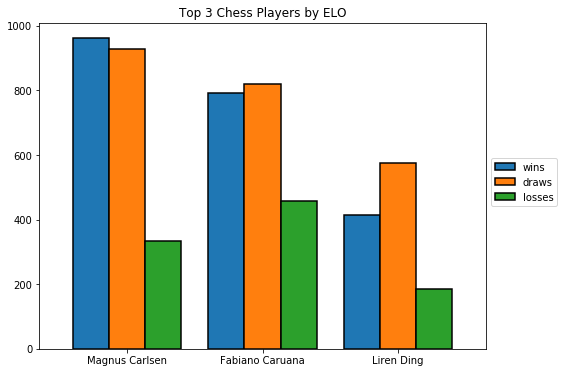

In [324]:
fig, ax = plt.subplots(figsize = (8,6))
chess_players.plot.bar(edgecolor = 'black', rot = 0, ax = ax, title = 'Top 3 Chess Players by ELO', width = 0.8, lw = 1.5)
plt.xlabel('')
handles, labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1, 0.6));

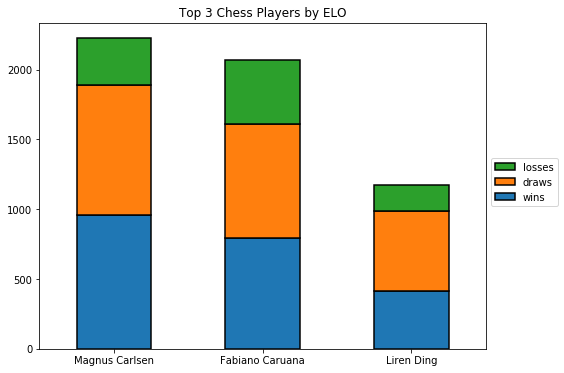

In [326]:
fig, ax = plt.subplots(figsize = (8,6))
chess_players.plot.bar(stacked=True, edgecolor = 'black', lw = 1.5, rot = 0, ax = ax, title = 'Top 3 Chess Players by ELO')
plt.xlabel('')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], bbox_to_anchor=(1, 0.6));